## Elixir Ecosystem Survey 2020

This is a quick look at the Elixir Ecosystem Survey 2020. Data was obtained from Hugo Baraúna's GitHub [repo](https://github.com/hugobarauna/elixir-ecosystem-2020-reponses-data).

## About the Survey

The survey was conducted over the course of the summer in 2020 by Brian Cardarella, who led the efforts to create and dissemniate the [survey](https://elixirforum.com/t/2020-elixir-ecosystem-survey/32396). The results of the survey were presented at [ElixirConf 2020](https://www.youtube.com/watch?v=-nVgAcy9wB0) by Brian. 

The survey was created on Typeform, but has since been taken down. Hugo kindly extracted the data and also created a PSQL dump of the normalized data. For this analysis, only the raw data extract was used.

### Packages used

In [1]:
library(tidyverse)
library(ggplot2)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Read and Cleaning the Data

I'm simply reading the csv file, and assigning all the columns to be character type. I could possibly encode the date time fields (eg. `Start Date (UTC)`), but not sure it's worth the effort right now...

In [2]:
raw <- read_csv("elixir-ecosystem-survey-2020-raw-data.csv", col_types = cols(.default = "c"))
raw

Warning message:
“Duplicated column names deduplicated: 'Other' => 'Other_1' [16], 'Other' => 'Other_2' [24], 'Other' => 'Other_3' [35], 'Other' => 'Other_4' [54], 'Other' => 'Other_5' [75], 'Other' => 'Other_6' [82], 'Other' => 'Other_7' [87], 'Other' => 'Other_8' [90], '.NET' => '.NET_1' [100], 'Java' => 'Java_1' [101], 'Go' => 'Go_1' [103], 'Rust' => 'Rust_1' [104], 'Crystal' => 'Crystal_1' [105], 'Other' => 'Other_9' [106], 'Other' => 'Other_10' [112], 'Other' => 'Other_11' [118], 'Other' => 'Other_12' [121], 'Other' => 'Other_13' [123], 'Other' => 'Other_14' [128], 'Other' => 'Other_15' [130], 'Other' => 'Other_16' [135], 'Other' => 'Other_17' [143], 'We are not yet in Production' => 'We are not yet in Production_1' [144], 'Other' => 'Other_18' [150], 'Rolled our own' => 'Rolled our own_1' [161], 'Other' => 'Other_19' [162], 'Other' => 'Other_20' [166], 'Other' => 'Other_21' [174]”


#,Are you actively using Elixir in either professional or personal projects?,Company migrated to another language/framework,I didn't like the language,I didn't like the community,Ecosystem lacked necessary solutions for use case,Other,What solutions was the Elixir ecosystem lacking?,Ruby,Java,⋯,API backend,LiveView,Other_21,Are you using Nerves?,What is the most recent version of Nerves that you have used?,Are you using Scenic?,Is your Nerves application distributed across many devices?,Start Date (UTC),Submit Date (UTC),Network ID
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
tfpi7rxttfr5b8930pipukw7qn3r5b8s,Yes,NA,NA,NA,NA,NA,NA,NA,NA,⋯,API backend,LiveView,NA,0,NA,NA,NA,2020-08-11 13:34:43,2020-08-11 13:51:45,66e270ab5e
qbxx0l4bpagp2q85qbxx0l4q0hkrb63a,Yes,NA,NA,NA,NA,NA,NA,NA,NA,⋯,API backend,NA,NA,0,NA,NA,NA,2020-08-11 13:08:48,2020-08-11 13:18:29,a3a3ba025b
jd9aahrn8bxmxxhayzzek47upjd9aahr,Yes,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,0,NA,NA,NA,2020-08-11 09:22:05,2020-08-11 09:38:50,44f66c892a
3h109llxrjgqfpqsllo3h10qe0ahs5pb,Yes,NA,NA,NA,NA,NA,NA,NA,NA,⋯,API backend,LiveView,NA,0,NA,NA,NA,2020-08-11 08:51:02,2020-08-11 08:57:45,a31e968bd9
1rg6w0665kiagny7ddb1rg6w06d6k7fp,Yes,NA,NA,NA,NA,NA,NA,NA,NA,⋯,API backend,NA,NA,0,NA,NA,NA,2020-08-11 07:57:31,2020-08-11 08:17:29,d5234f9046
ck2g019k5qn3fqeng6jiqck2g019riv8,Yes,NA,NA,NA,NA,NA,NA,NA,NA,⋯,API backend,NA,NA,0,NA,NA,NA,2020-08-11 06:15:03,2020-08-11 06:21:50,ec211a5d07
lzhk9luqsib7y7sglz5353l1rtjg2ldb,Yes,NA,NA,NA,NA,NA,NA,NA,NA,⋯,API backend,NA,NA,0,NA,NA,NA,2020-08-11 00:09:11,2020-08-11 00:18:45,4523d37dbe
lkp88tar9epsb9etqqlkp8ozbuguckv3,Yes,NA,NA,NA,NA,NA,NA,NA,NA,⋯,API backend,LiveView,NA,0,NA,NA,NA,2020-08-10 21:41:34,2020-08-10 21:48:55,e94f6bd98f
rou6khd0bub1yh3rchwpt7rou6q116ba,Yes,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,0,NA,NA,NA,2020-08-10 13:24:22,2020-08-10 20:57:39,967ba669cb


A peculiarity of the data dump is that a row represents the answers from one respondent (ie. one survey response per row), where the column names are the questions themselves, or an answer choice, when a choice was given in the question, as well as some metadata. 

**An important issue with the data was that there were 14 multiple choice questions explicity missing from the data, but the choices had been preserved.** For now, I've imputed what I believe are the questions that were asked.

In [3]:
additions <- c(
  "What tool do you use to format code?",
  "What CI/CD tool do you use?",
  "How do you deploy Elixir in production?",
  "What platform do you use to deploy your code in production?",
  "What database do you most often use with Elixir?",
  "What tool do you most often use to debug Elixir code?",
  "What were challenges to adopting Elixir for your team?",
  "What benefits did your team experience by using Elixir?",
  "In what capacities is your company using Elixir?",
  "Do you subscribe to any Elixir newsletters?",
  "Do you listen to any Elixir podcasts?",
  "Do you participate in any Elixir forums or communities?",
  "How do you prefer to learn a new language?",
  "How were you first introduced to Elixir?"
)

I'll convert the data into [long form or "tidy data"](https://vita.had.co.nz/papers/tidy-data.html) which will allow analysis of the survey responses to be much easier.

In [4]:
long <-
  raw %>%
  mutate(`What tool do you use to format code?` = NA, .after = 162) %>%
  mutate(`What CI/CD tool do you use?` = NA, .after = 150) %>%
  mutate(`How do you deploy Elixir in production?` = NA, .after = 143) %>%
  mutate(`What platform do you use to deploy your code in production?` = NA, .after = 137) %>%
  mutate(`What database do you most often use with Elixir?` = NA, .after = 130) %>%
  mutate(`What tool do you most often use to debug Elixir code?` = NA, .after = 123) %>%
  mutate(`What were challenges to adopting Elixir for your team?` = NA, .after = 112) %>%
  mutate(`What benefits did your team experience by using Elixir?` = NA, .after = 106) %>%
  mutate(`In what capacities is your company using Elixir?` = NA, .after = 92) %>%
  mutate(`Do you subscribe to any Elixir newsletters?` = NA, .after = 82) %>%
  mutate(`Do you listen to any Elixir podcasts?` = NA, .after = 75) %>%
  mutate(`Do you participate in any Elixir forums or communities?` = NA, .after = 66) %>%
  mutate(`How do you prefer to learn a new language?` = NA, .after = 24) %>%
  mutate(`How were you first introduced to Elixir?` = NA, .after = 18) %>%
  pivot_longer(
    !c(`#`, contains("UTC"), `Network ID`),
    names_to = "question",
    values_to = "answer"
  ) %>%
  janitor::clean_names()

#long

Now that the data is in long form, I separate the questions from the choices. Unfortunately there is no programmatic way to do this so I manually created a `questions` table. I created a temporary table `questions_with_choices` to make the manual extraction of the questions a lot easier.

In [5]:
questions_with_choices <-
  long %>%
  distinct(question)

# write_csv(questions_with_choices, "./output/questions_with_choices.csv")

# questions_with_choices

In [6]:
qs <- c(
  "Are you actively using Elixir in either professional or personal projects?",
  "What solutions was the Elixir ecosystem lacking?",
  "How long have you been using Elixir?",
  "What is the most recent version of Elixir that you have used?",
  "Have you written any Erlang?",
  "What is your age range?",
  "Which gender do you identify as?",
  "In which country do you currently reside?",
  "Do you have a college degree in Computer Science or similar degree?",
  "What part of Elixir did you find most difficult to learn?",
  "Do you maintain any Open Source (OSS) Elixir libraries?",
  "Have you made contributions to anyone else's OSS Elixir libraries?",
  "Have you made OSS contributions back to Elixir?",
  "How often do you attend local Elixir meetups?",
  "Do you help organize Elixir meetups?",
  "Do you attend your continent's major Elixir Conference",
  "Do you attend any regional Elixir/Erlang conferences?",
  "What industry is your company in?",
  "What is your role within your company?",
  "Does your company use Elixir?",
  "How long has your company been using Elixir?",
  "How many engineers are using Elixir at your company?",
  "Did your company migrate from another language or choose Elixir for a new project?",
  "Can you say which language(s) and describe why it won?",
  "Which operating system do you primarily develop on?",
  "Which editor/IDE do you primarily write Elixir with?",
  "Which operating system do you deploy to?",
  "Have you ever used Hot Code Reloading in production?",
  "If there is one library that you are excited about in 2020 which is it?",
  "Are you using Phoenix?",
  "What is the most recent version of Phoenix that you have used?",
  "Are you running Phoenix in production?",
  "Are you using Nerves?",
  "What is the most recent version of Nerves that you have used?",
  "Are you using Scenic?",
  "Is your Nerves application distributed across many devices?",
  additions
)

questions <- tibble(id = seq_along(qs), question = qs)

# write_csv(questions, "./ouptut/questions.csv")
# questions

An assumption I've made here is that the data from Typeform is organized so that choices immediately follow the question, which allows me to create a relationship between questions and choices. For example the question "Which Elixir newsletters do you subscribe to?", is immediately followed by "Elixir Radar", "ElixirWeekly", "ElixirDigest", "Other". 

In [7]:
choices <-
  questions_with_choices %>%
  left_join(questions, by = c("question" = "question")) %>%
  fill(id) %>%
  anti_join(questions, by = c("question" = "question")) %>%
  rename(question_id = id) %>%
  rename(choice = question) %>%
  mutate(id = seq_len(nrow(.))) %>%
  select(id, question_id, choice)

# write_csv(choices, "./output/choices.csv")

#choices

With the data separated into 3 tables `survey`, `questions` and `choices`, it's easy to perform basic aggregations and plotting on the data. Here's one example of creating a summary bar plot for each question.

In [56]:
## Helper functions
summarize_survey <- function(df) {
  df %>%
    mutate(answer = forcats::fct_lump_n(answer, 14, ties.method = "first")) %>%
    group_by(answer) %>%
    summarize(n = n()) %>%
    mutate(prop = n / sum(n)) %>%
    arrange(desc(prop)) 
}

barplot_survey <- function(df, question) {
  ggplot(df, aes(prop, reorder(answer, -prop))) +
    geom_col(width = 0.4, fill = "steelblue") +
    geom_text(aes(label = scales::percent(prop, accuracy = 0.1)), hjust = -0.10) +
    theme_classic() +
    #     ggtitle(question) +
    ylab("") +
    xlab("Proportion (%)") +
    labs(title = str_wrap(question, 90)) +
    scale_x_continuous(labels = scales::label_percent()) +
    scale_y_discrete(labels = function(x) stringr::str_wrap(x, 40))
}


In [57]:
survey_plots <-
  long %>%
  inner_join(questions, by = c("question" = "question")) %>%
  filter(
    !(question %in% additions),
    !is.na(answer),
    answer != "Choose not to answer"
  ) %>%
  replace_na(list(answer = "Did not answer.")) %>%
  mutate(
    answer = ifelse(answer == "1", "Yes", answer),
    answer = ifelse(answer == "0", "No", answer)
  ) %>%
  group_by(question) %>%
  nest() %>%
  mutate(
    summary = map(data, summarize_survey),
    n = map_int(summary, ~ sum(.x$n)),
    question = paste0(question, " (N = ", n, ")"),
    plot = map2(summary, question, barplot_survey)
  )

## Top 15 Results for Survey Responses

[[1]]

[[2]]


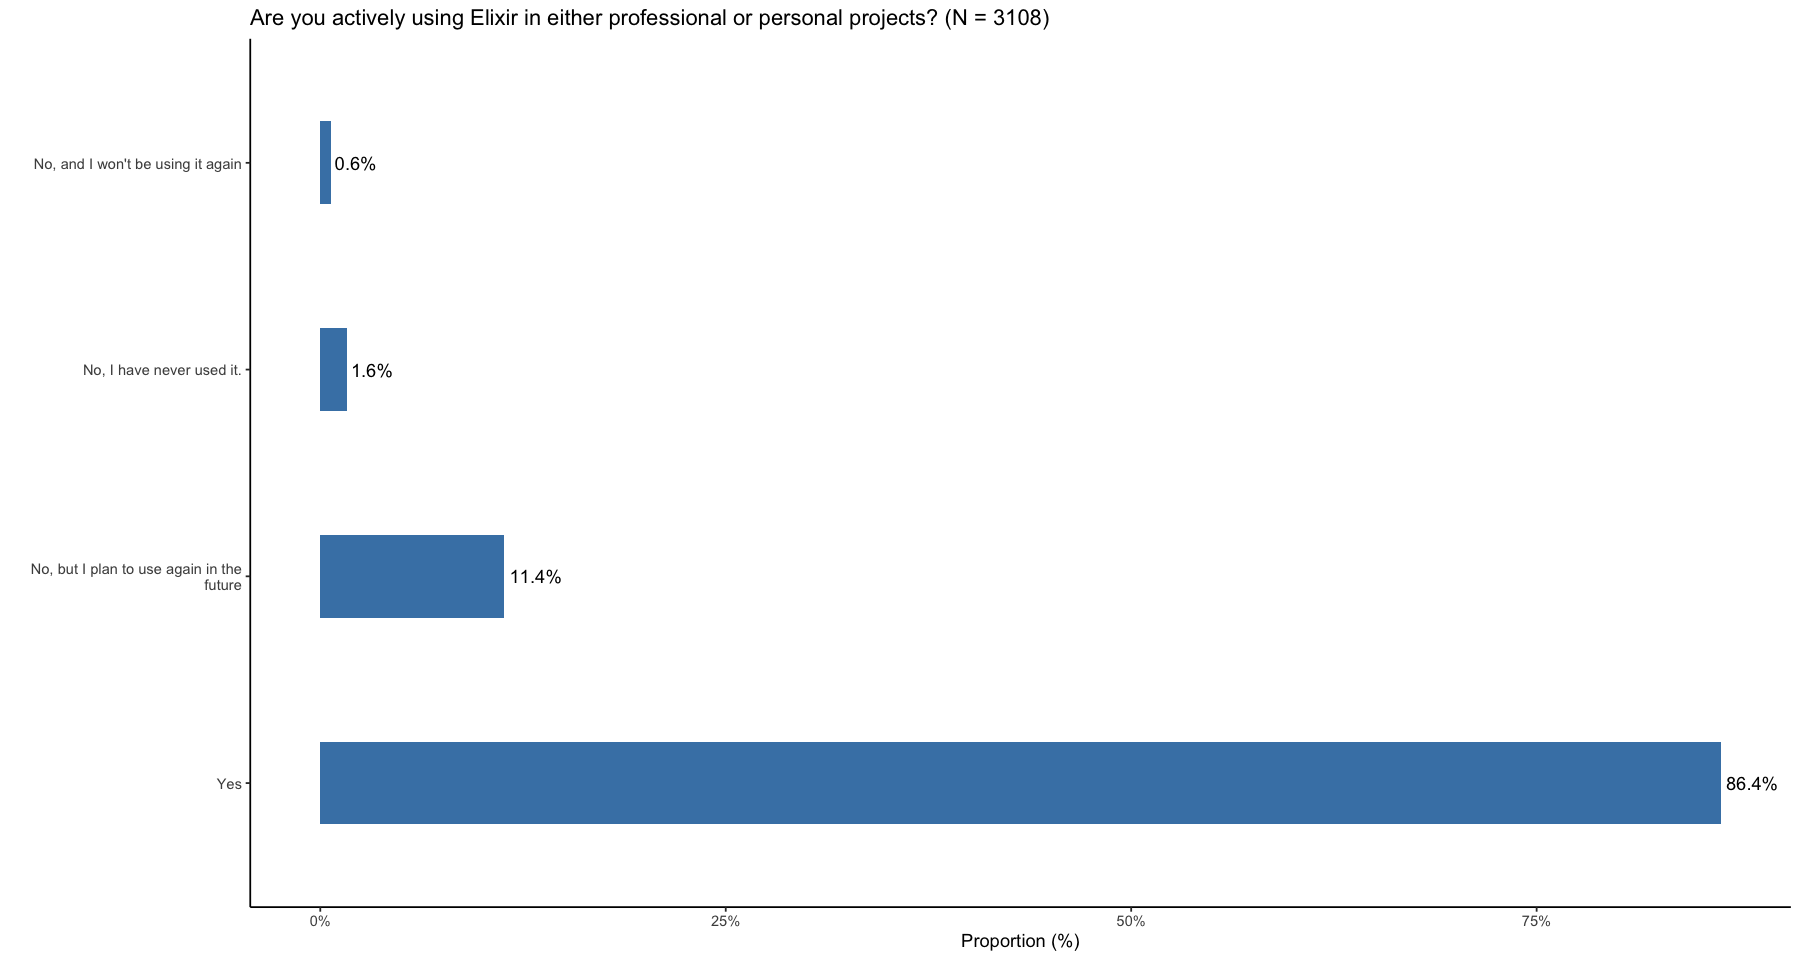


[[3]]


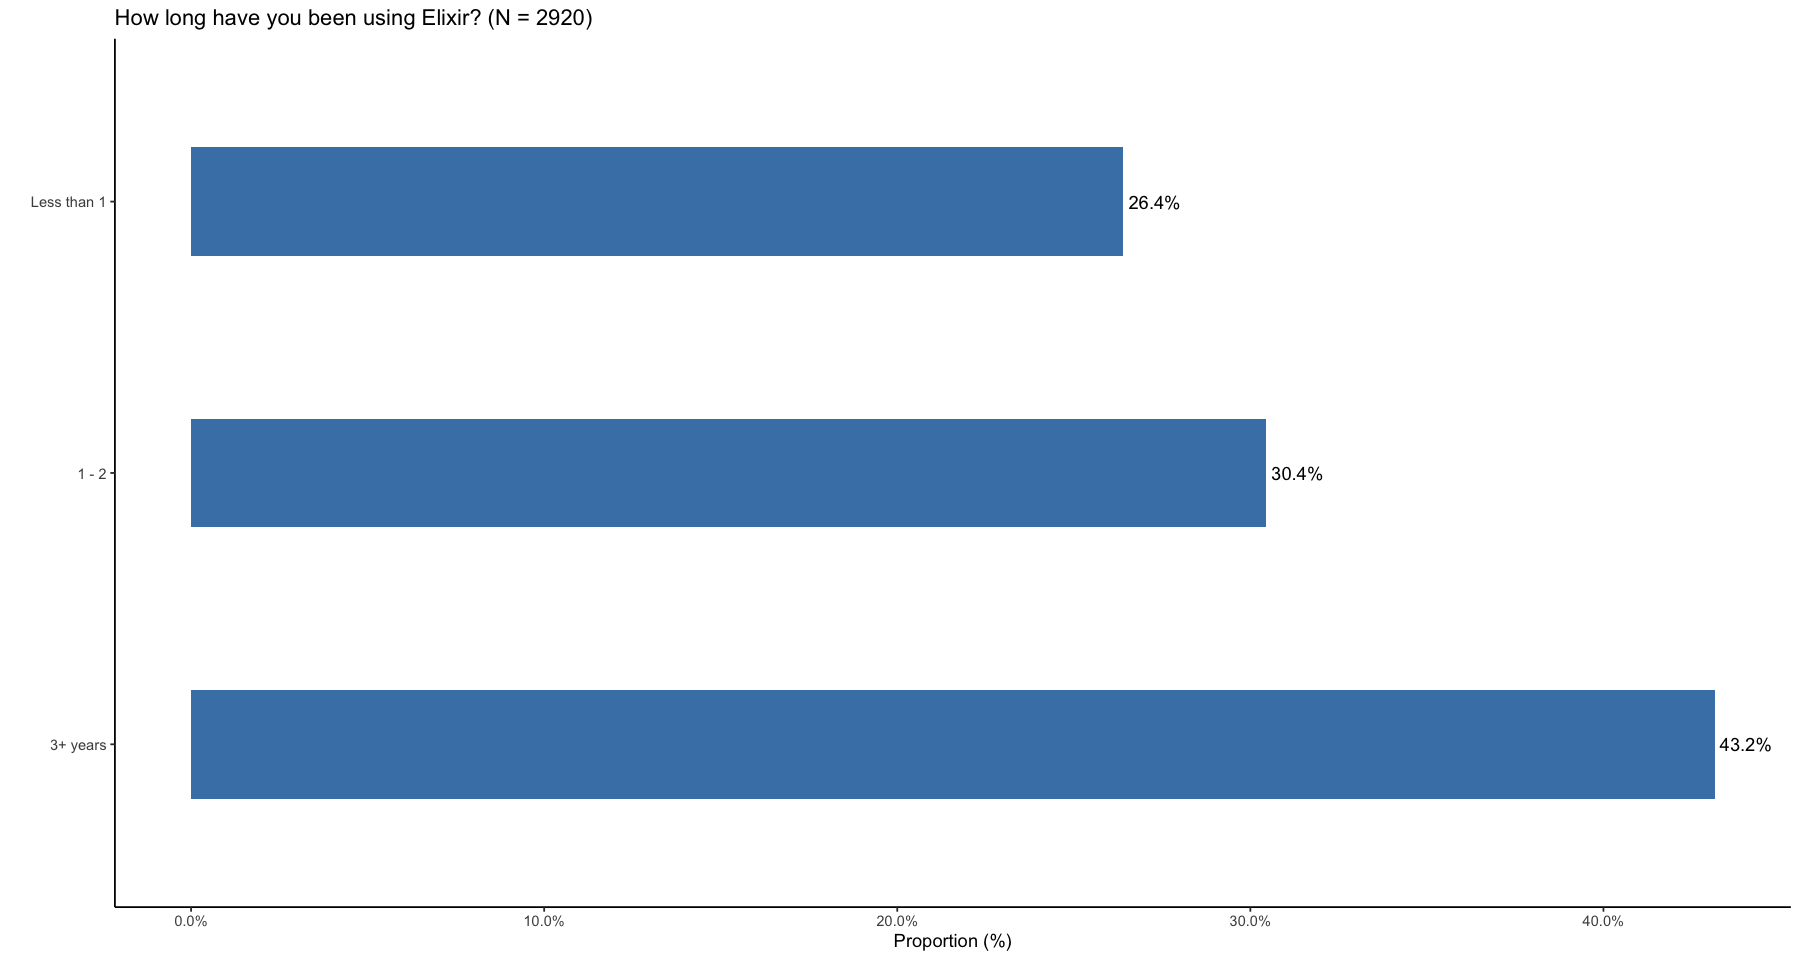


[[4]]


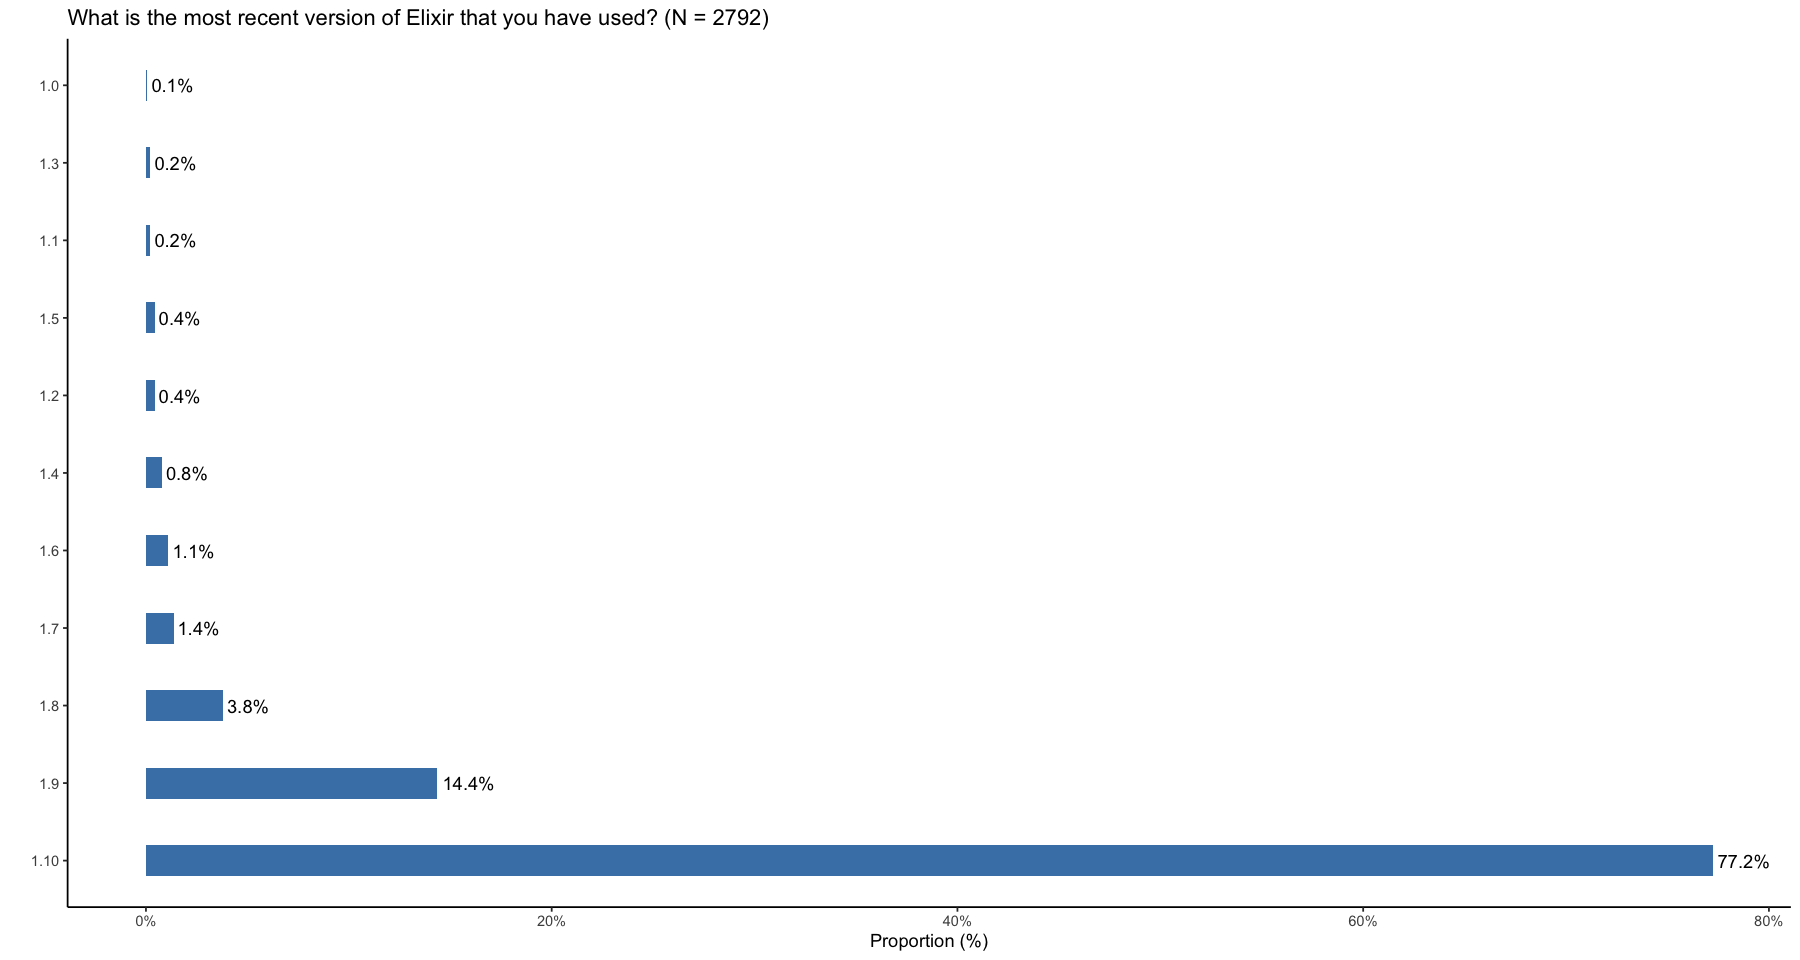


[[5]]


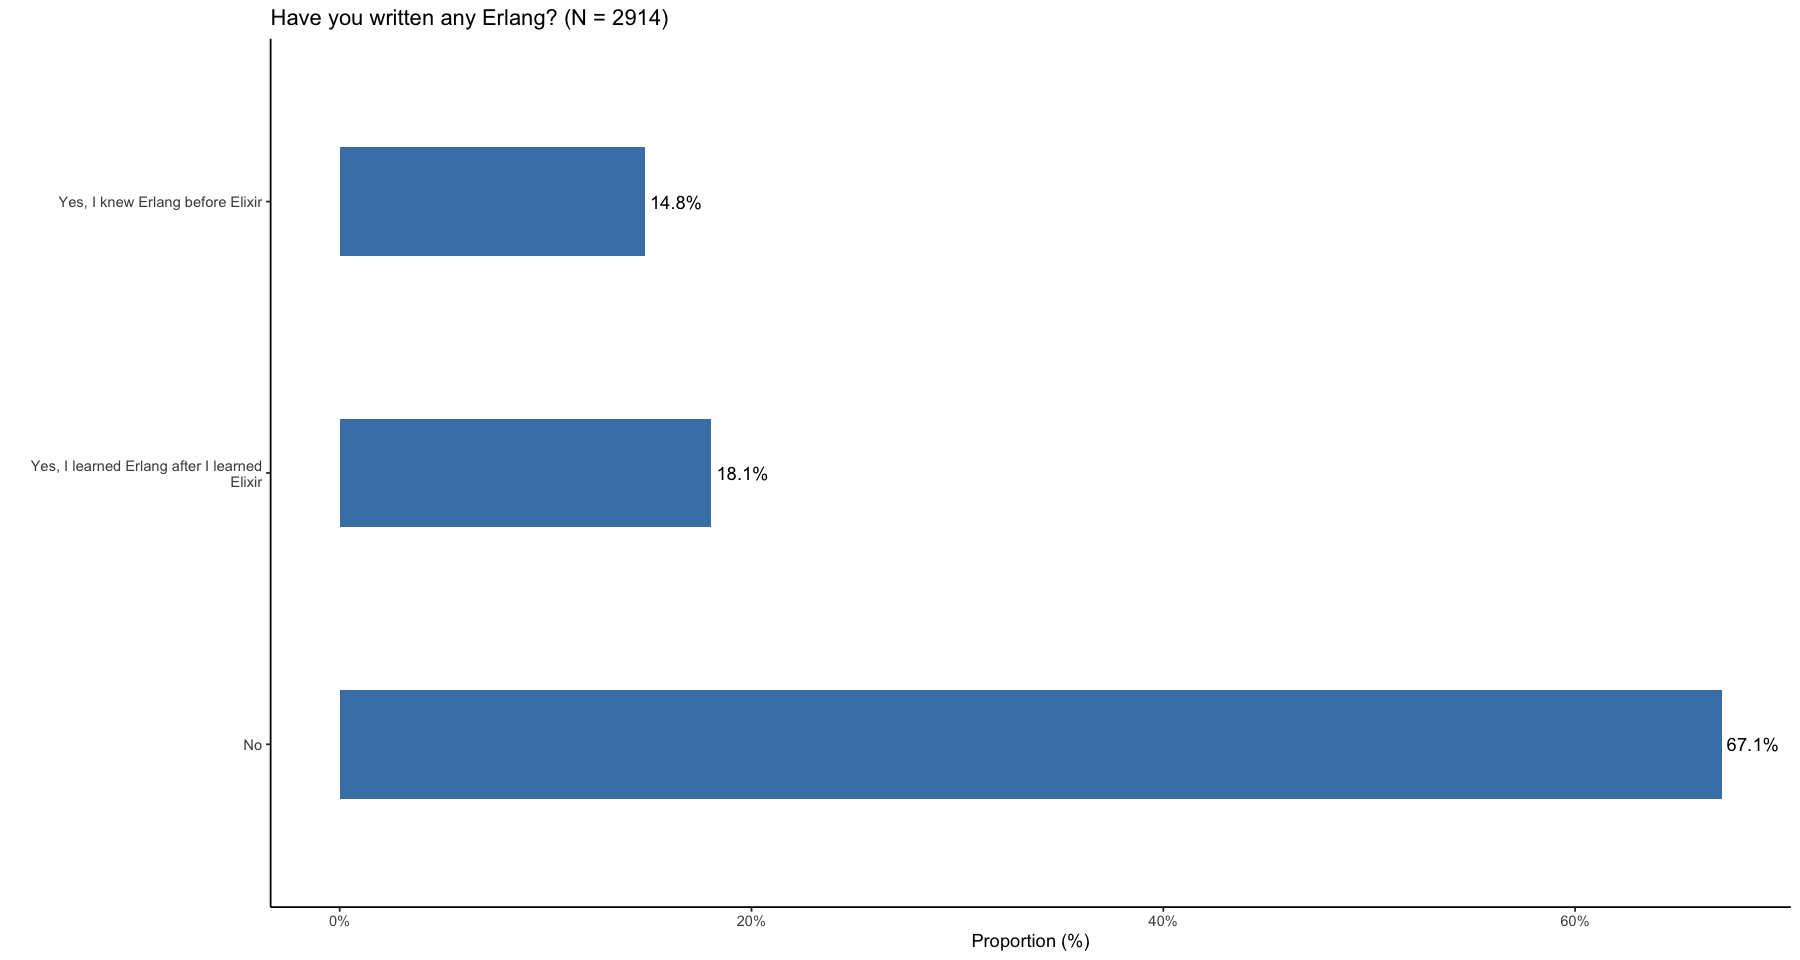


[[6]]


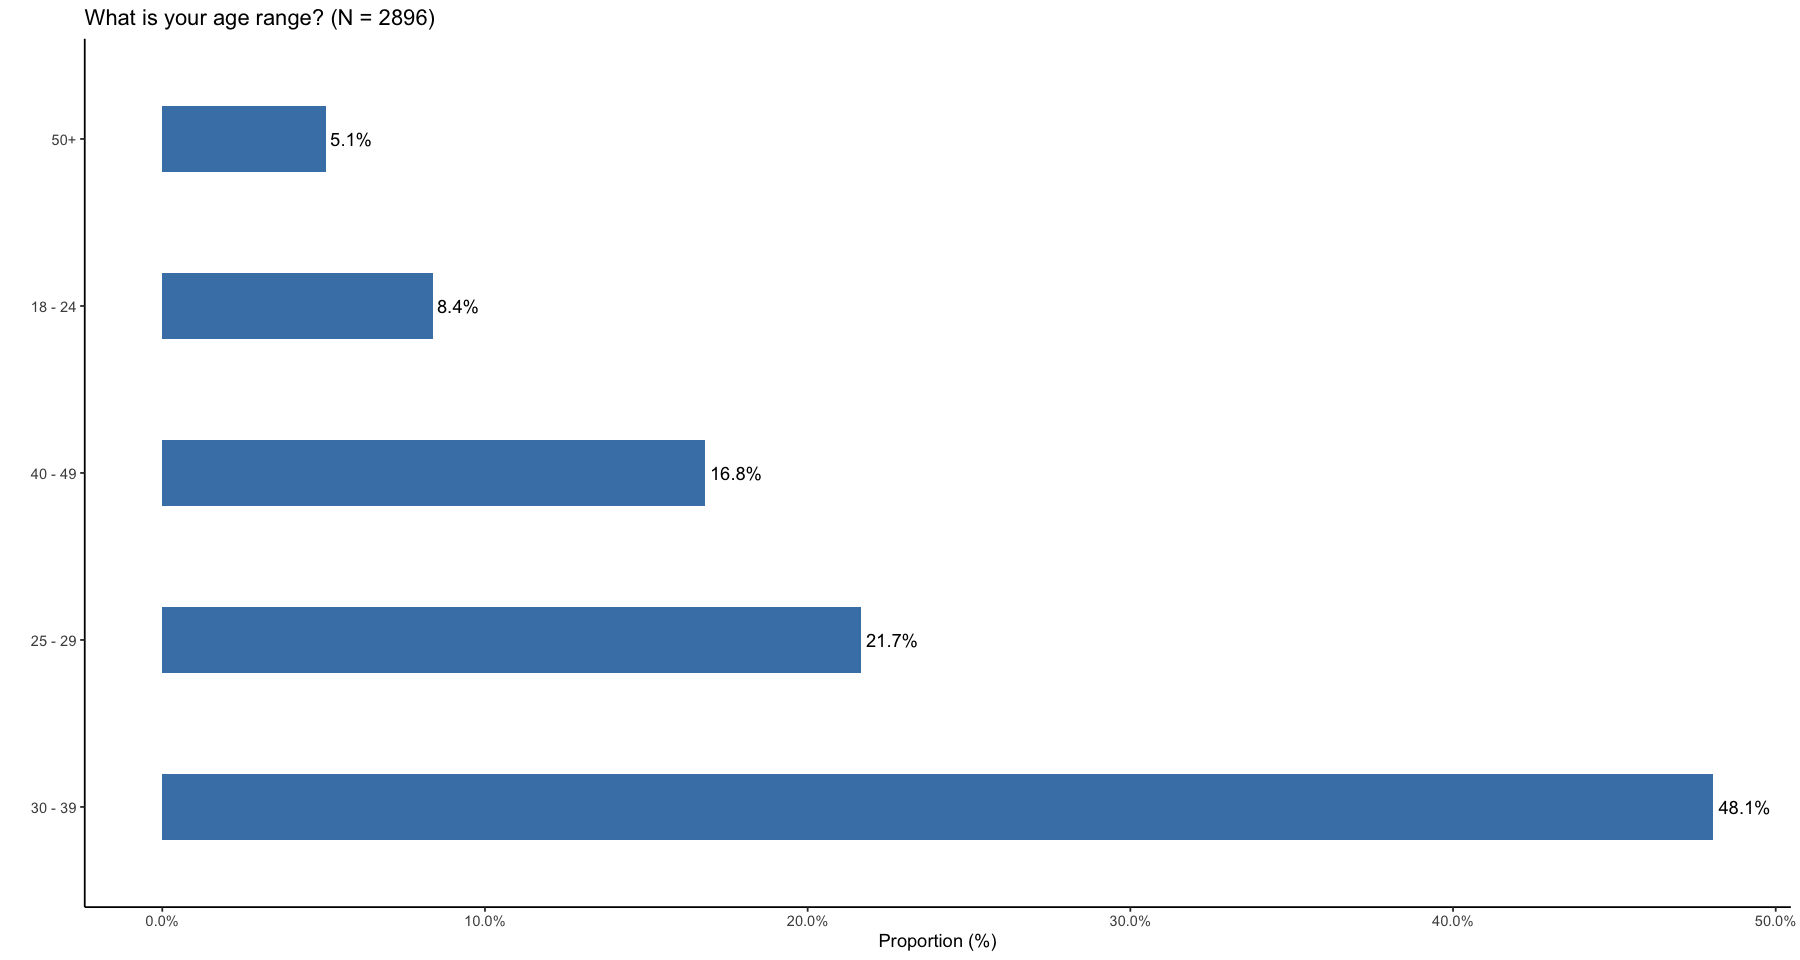


[[7]]


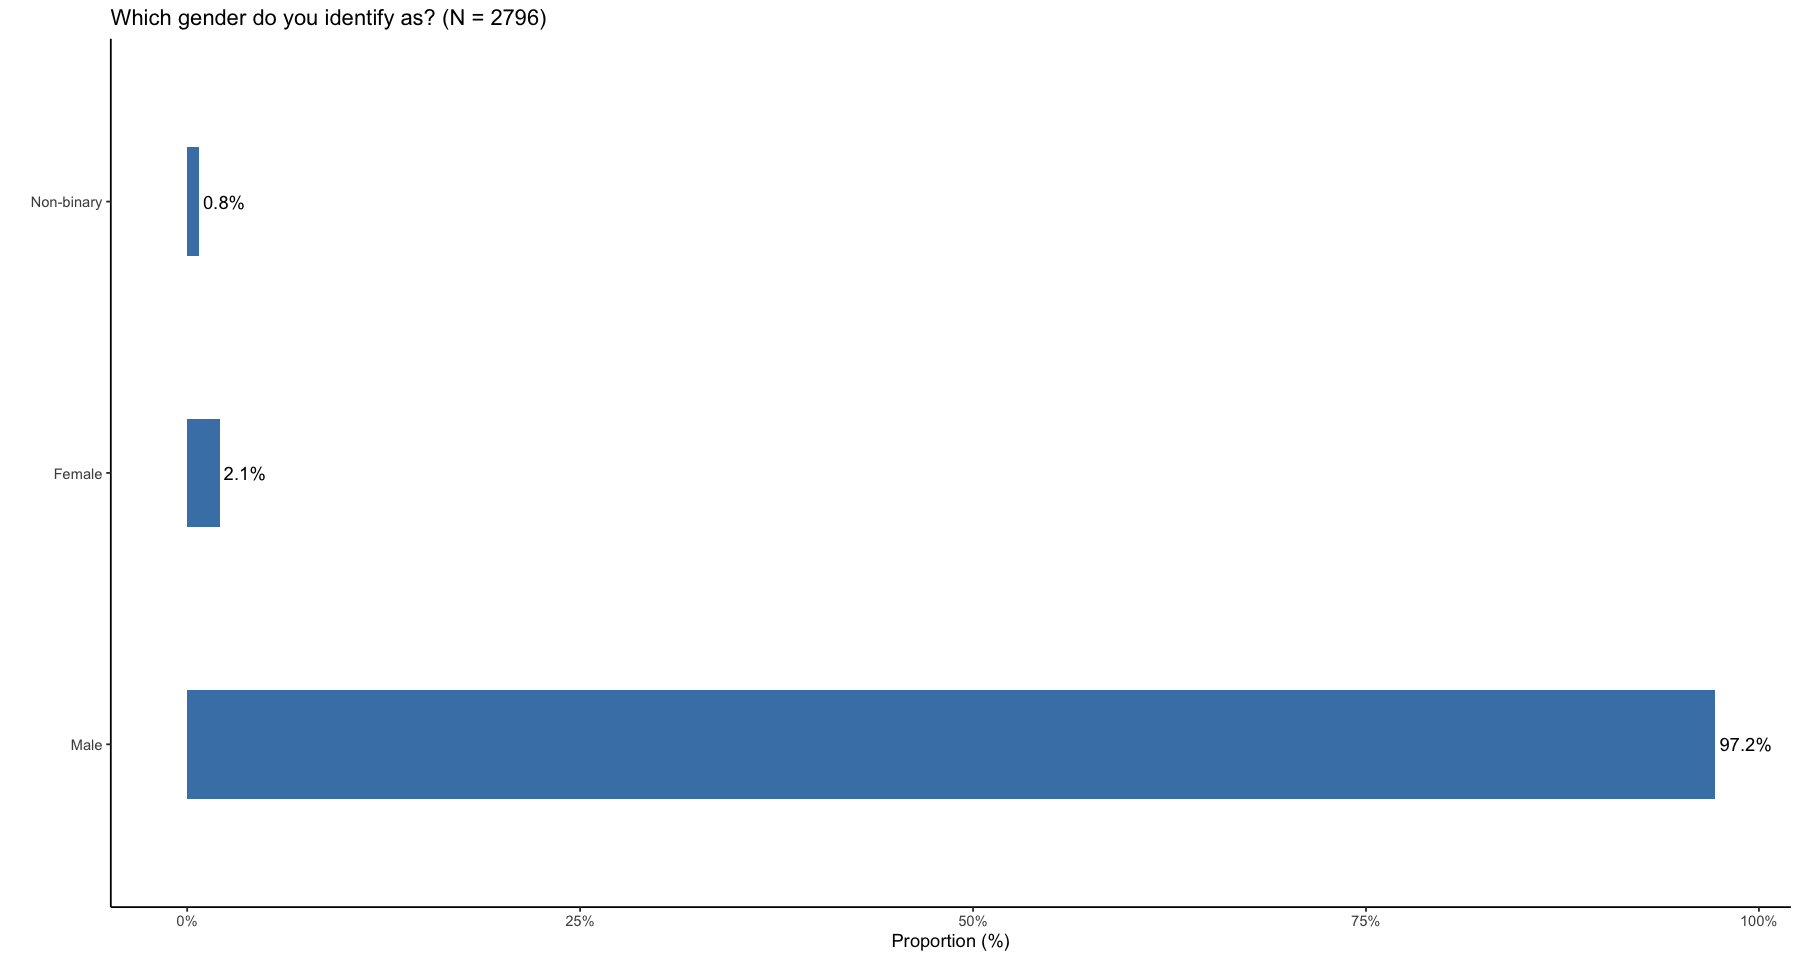


[[8]]


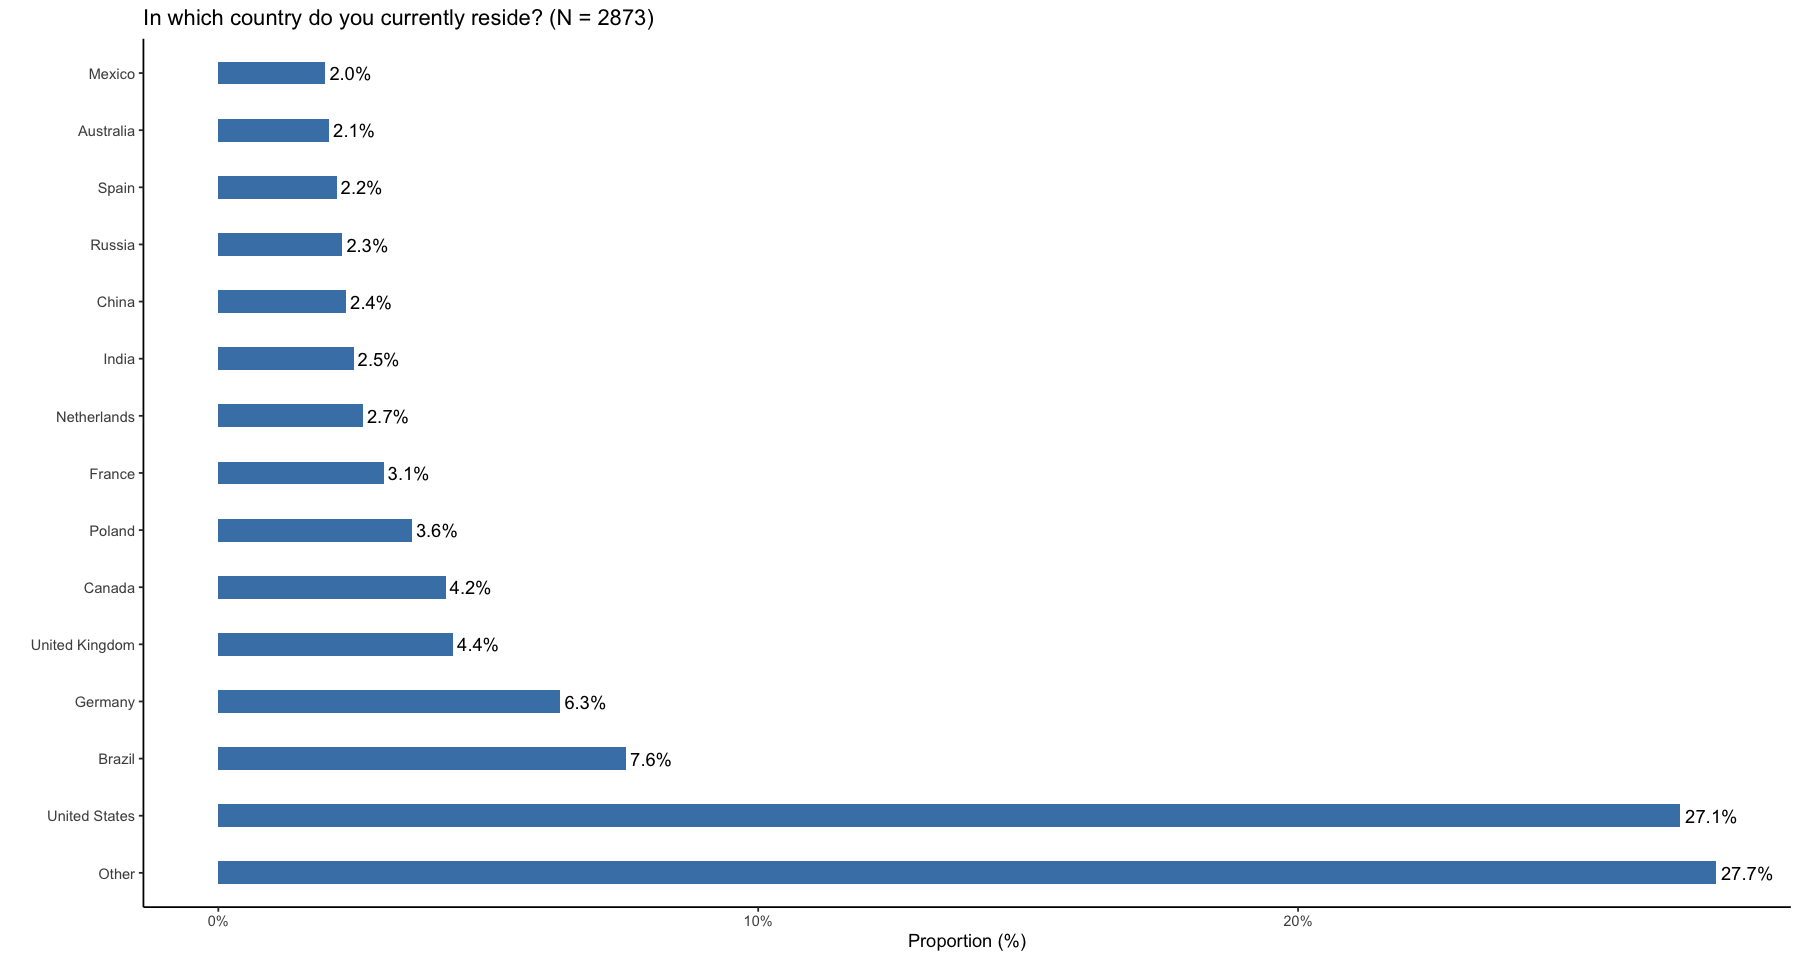


[[9]]


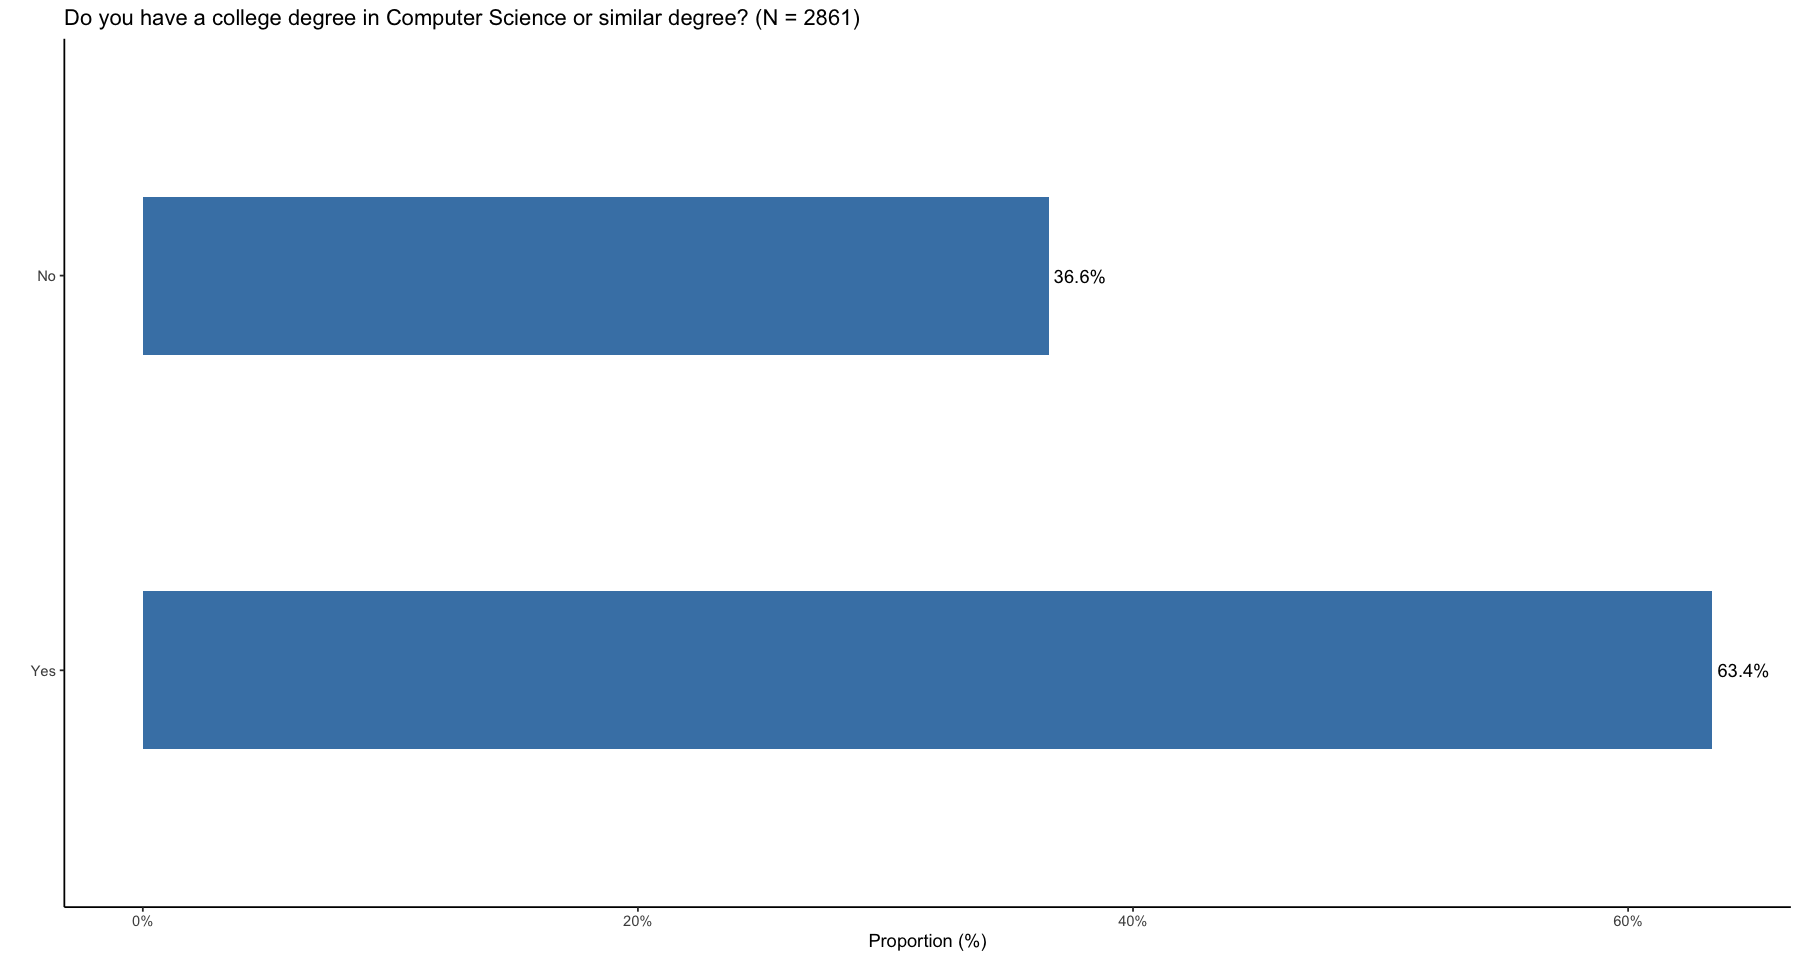


[[10]]


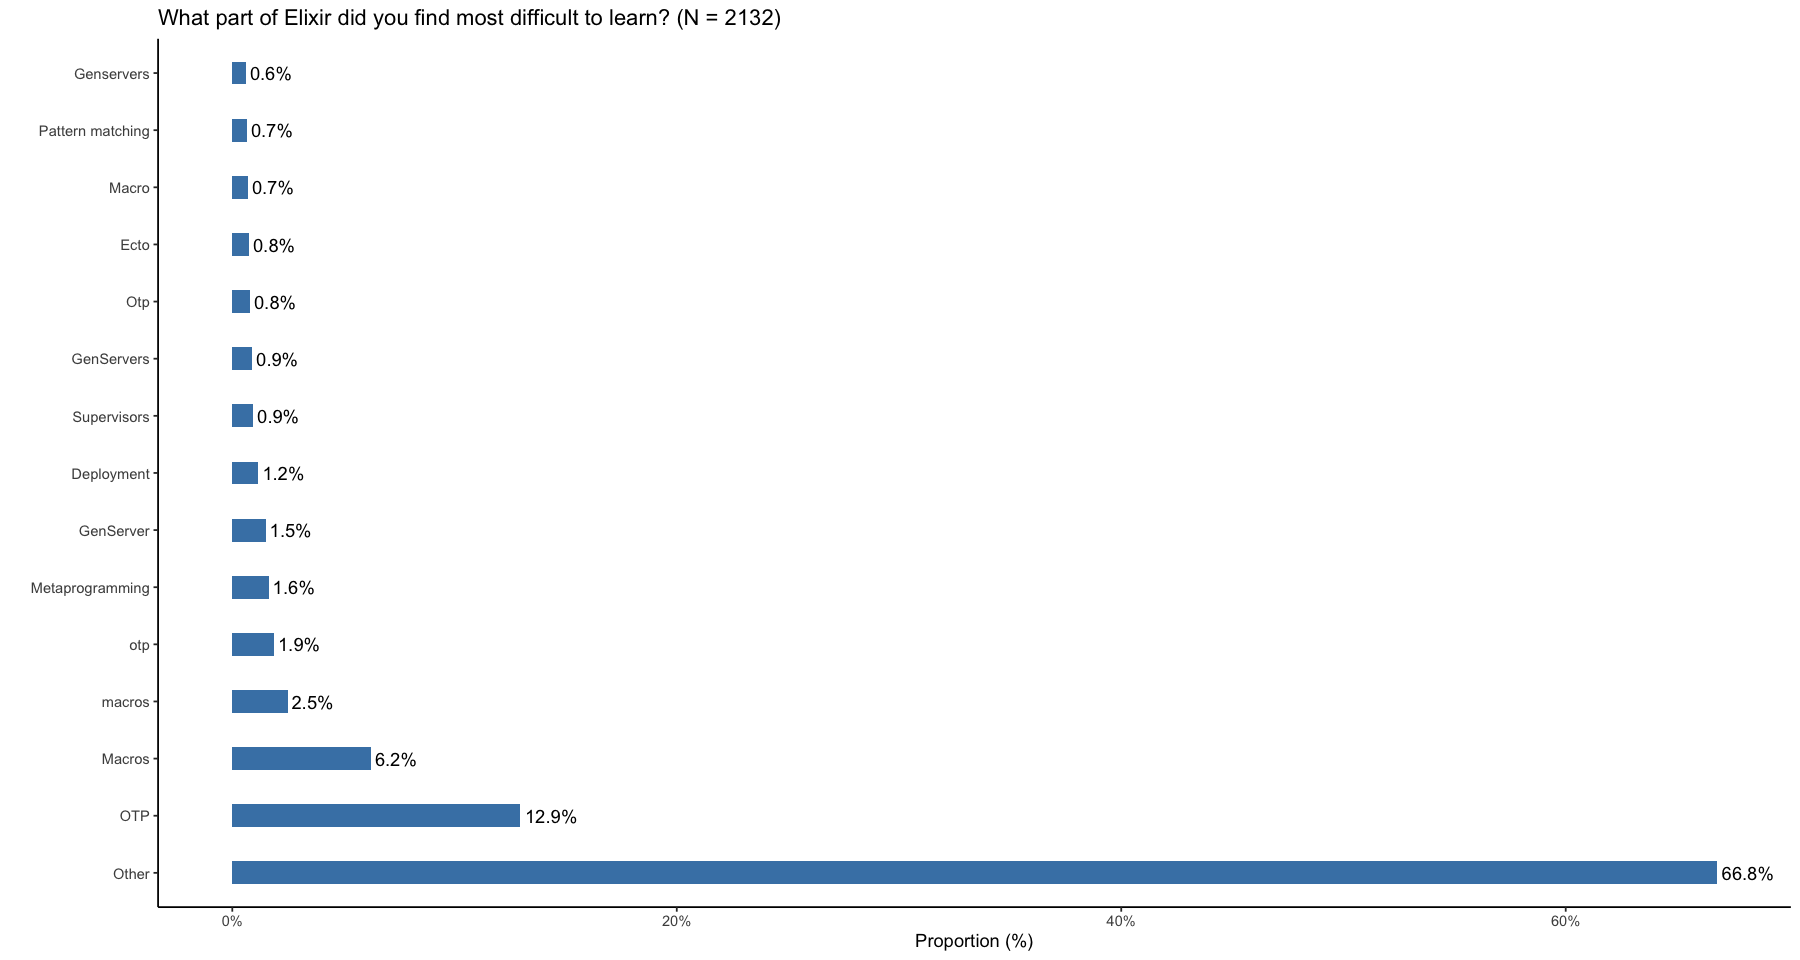


[[11]]


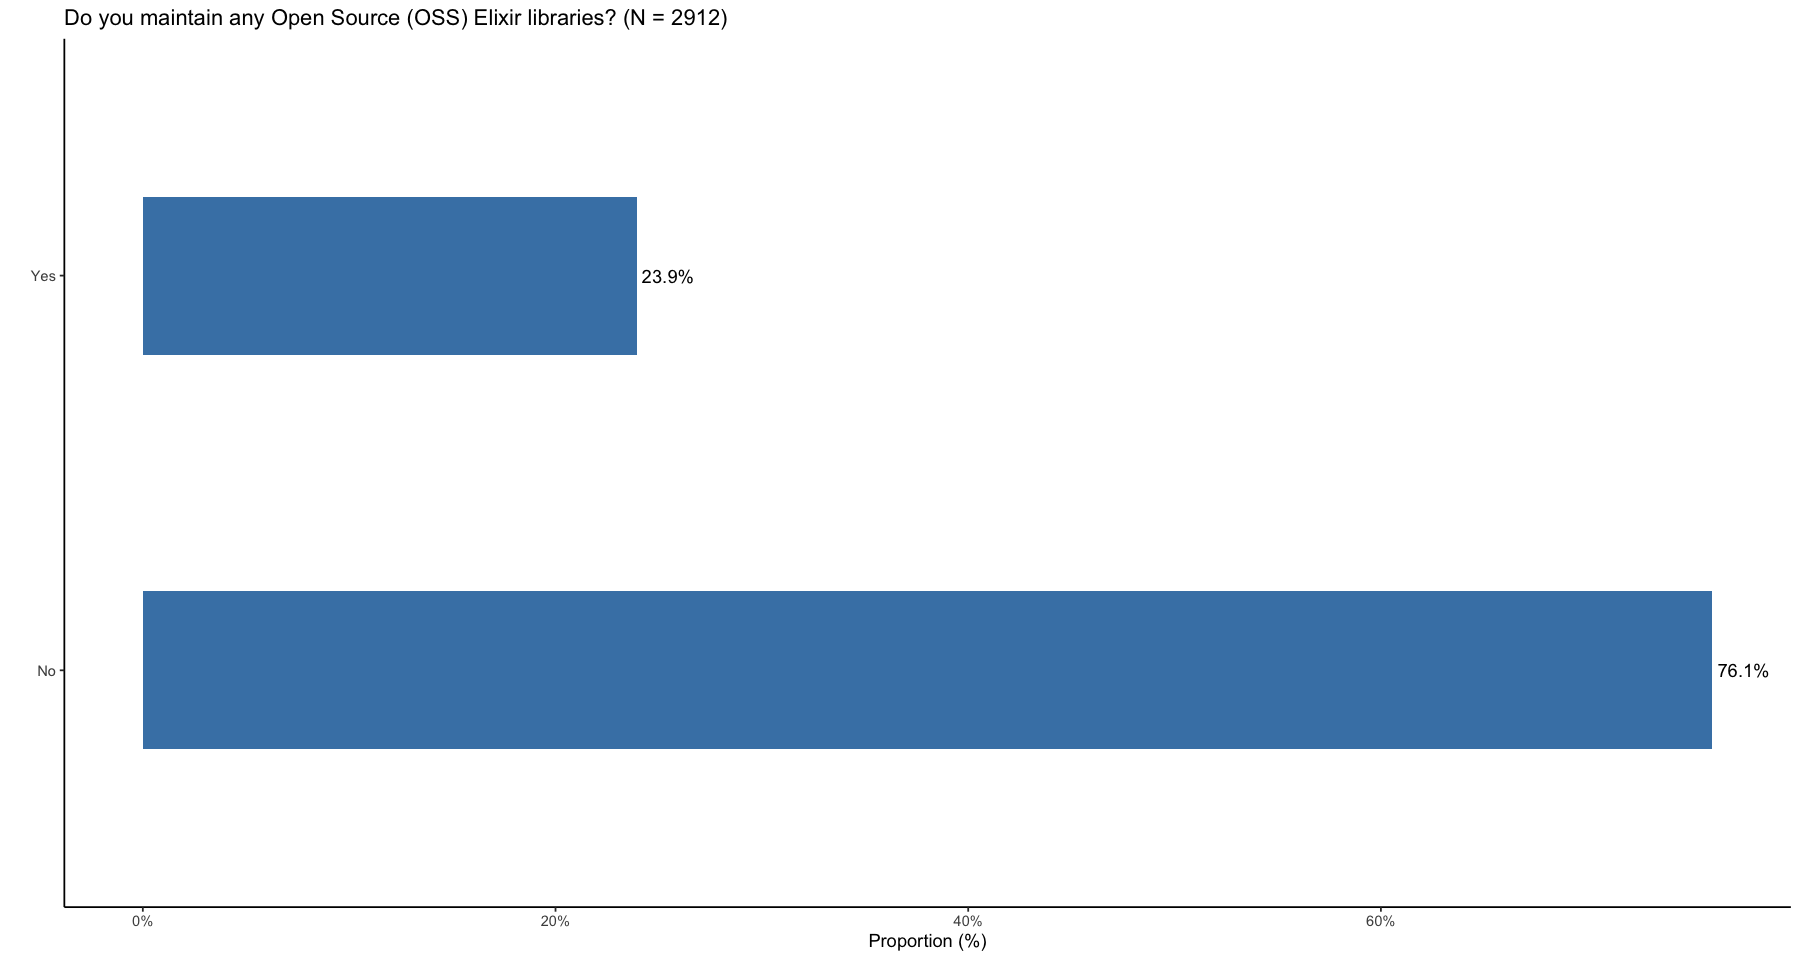


[[12]]


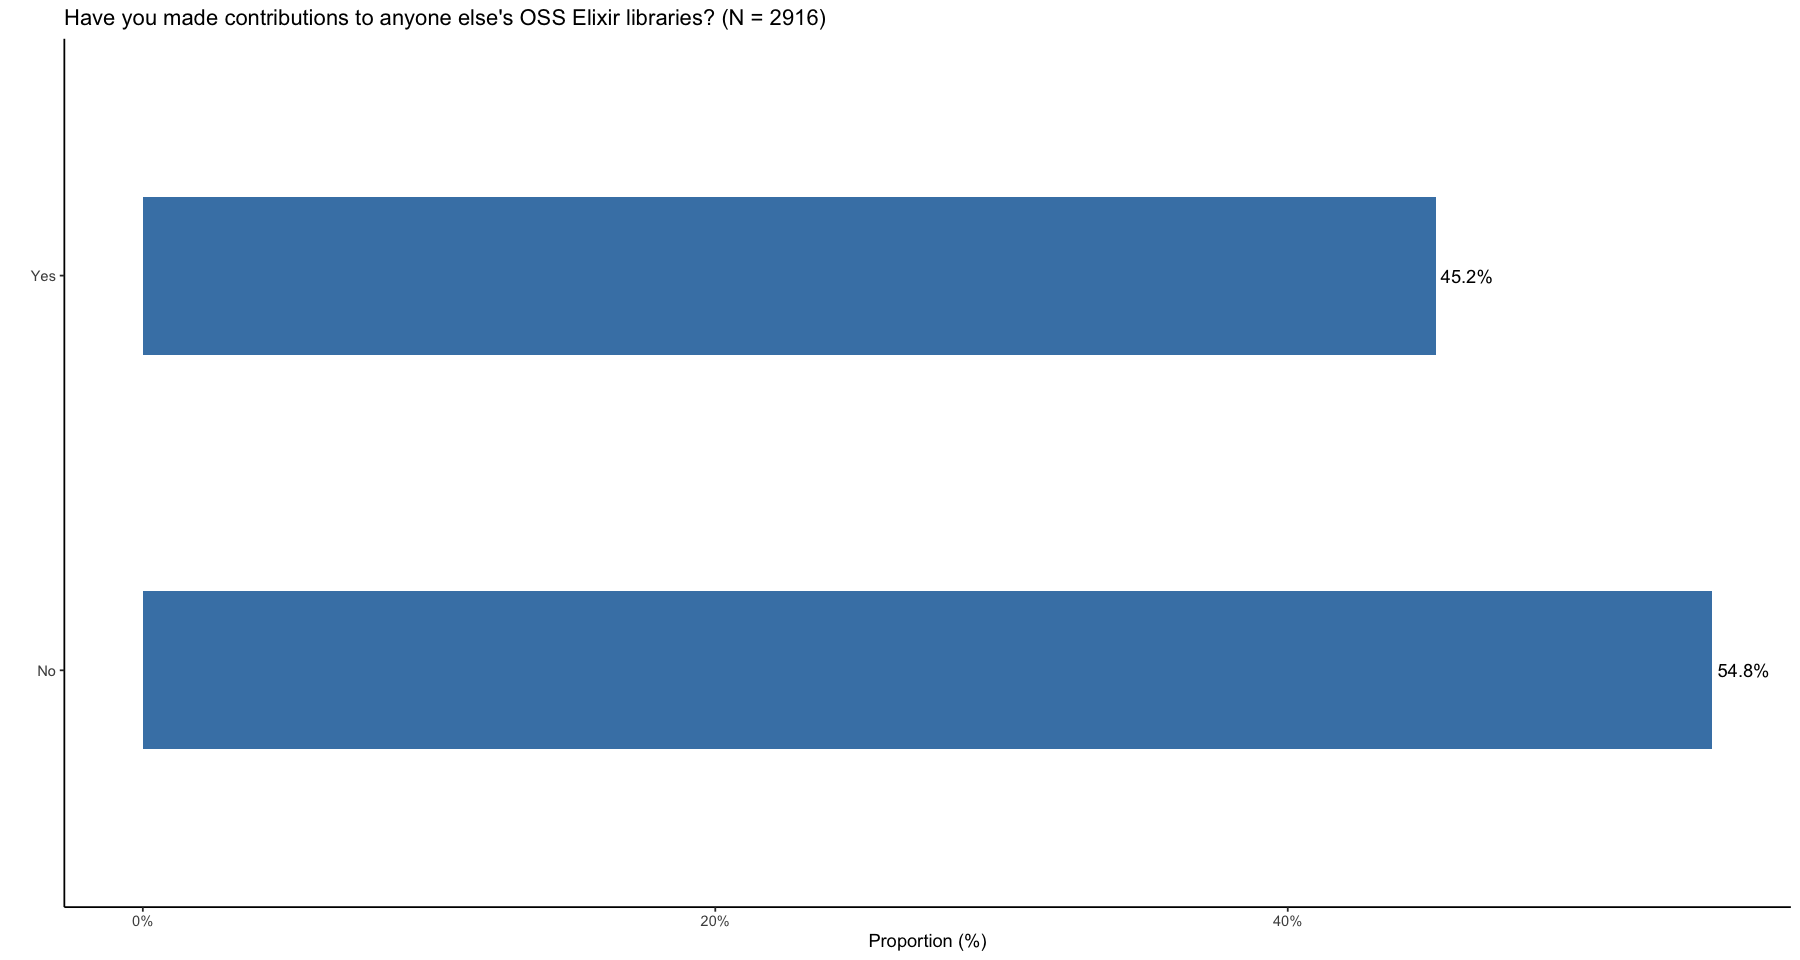


[[13]]


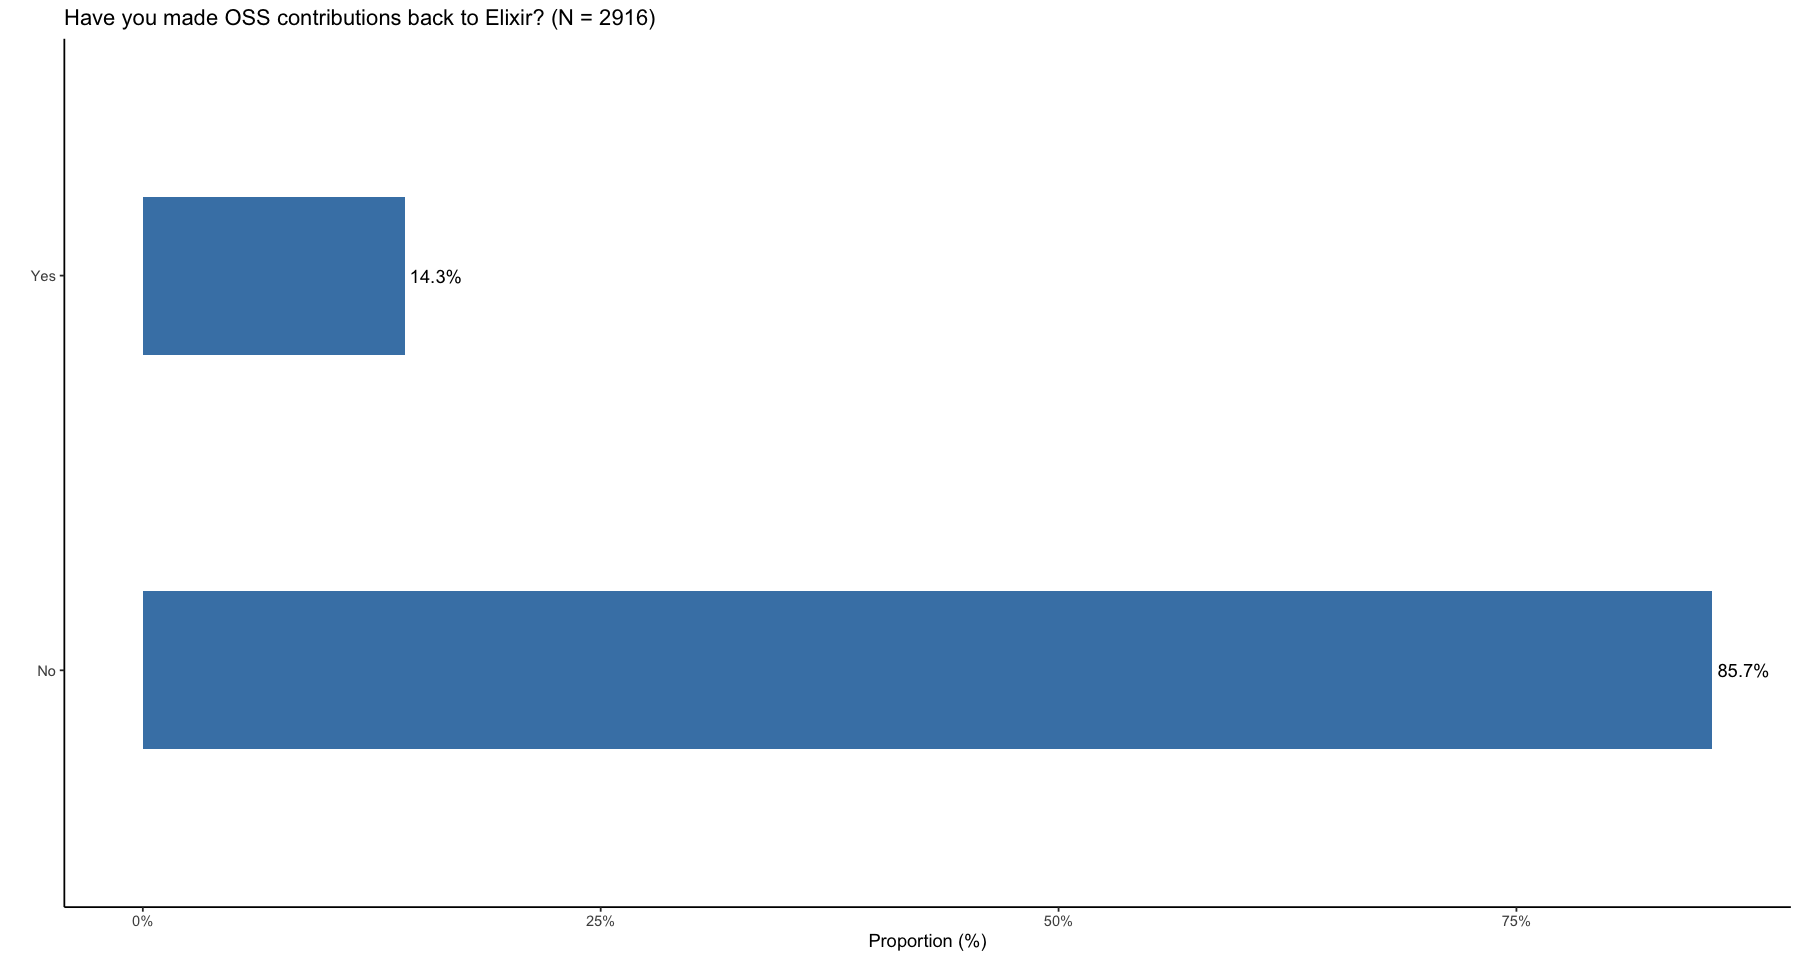


[[14]]


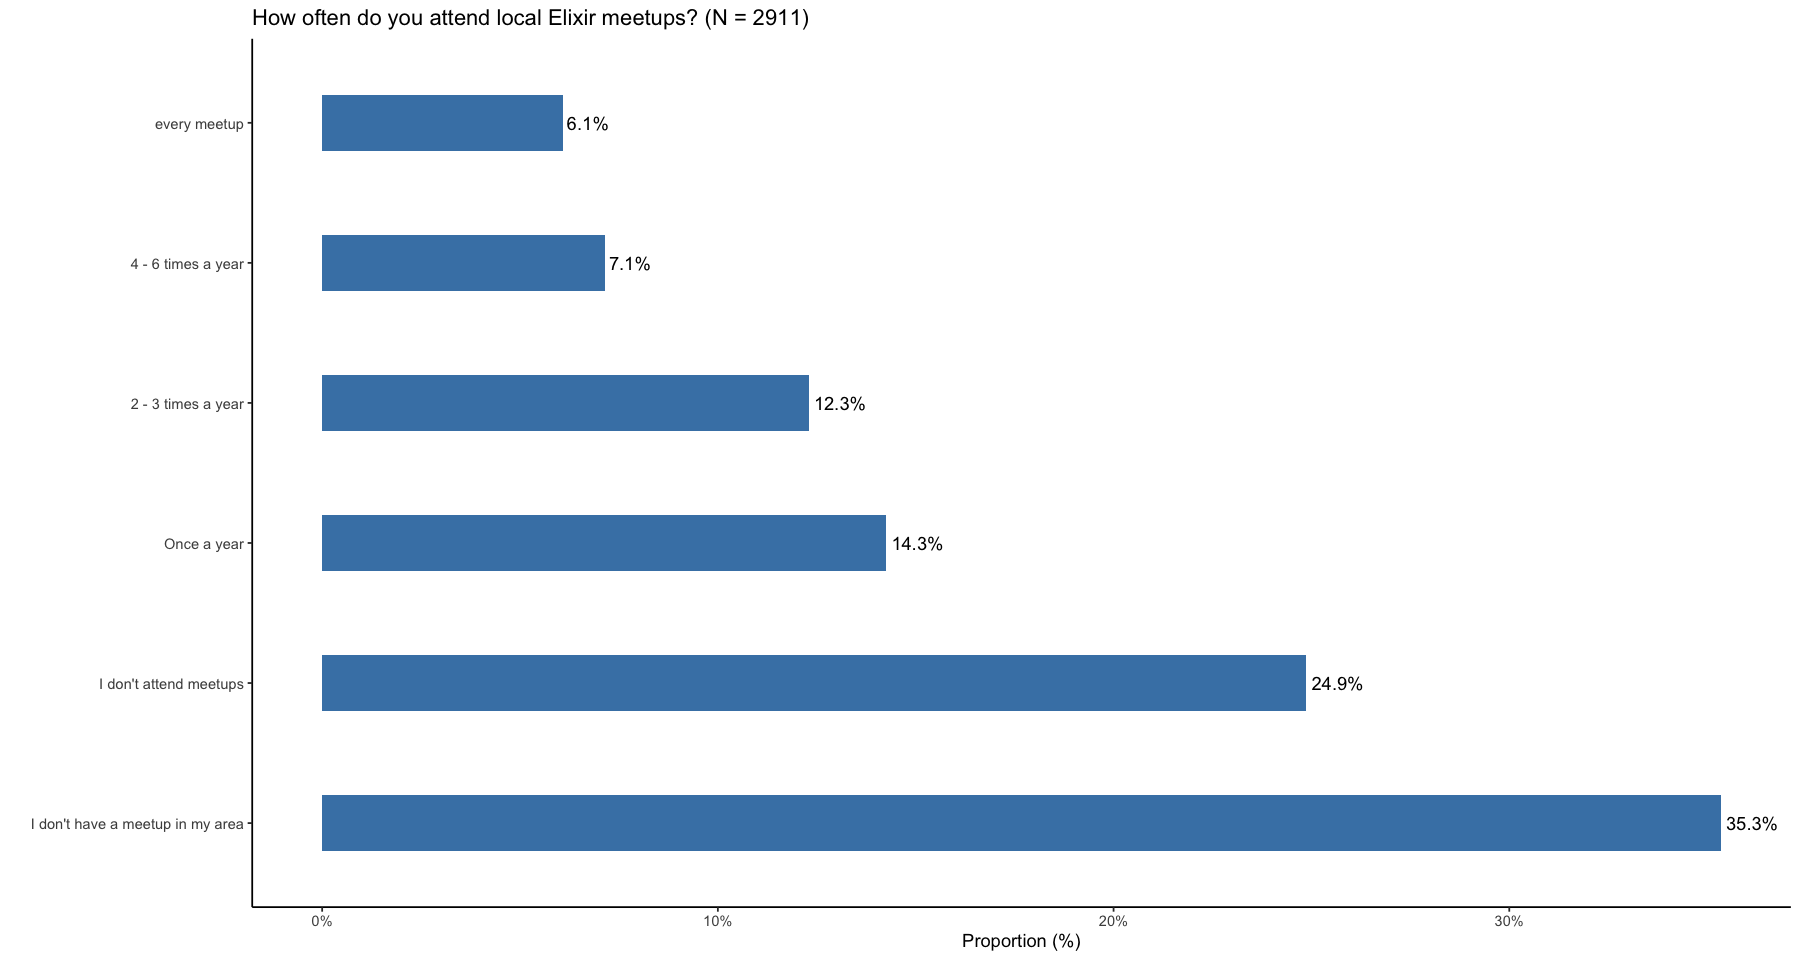


[[15]]


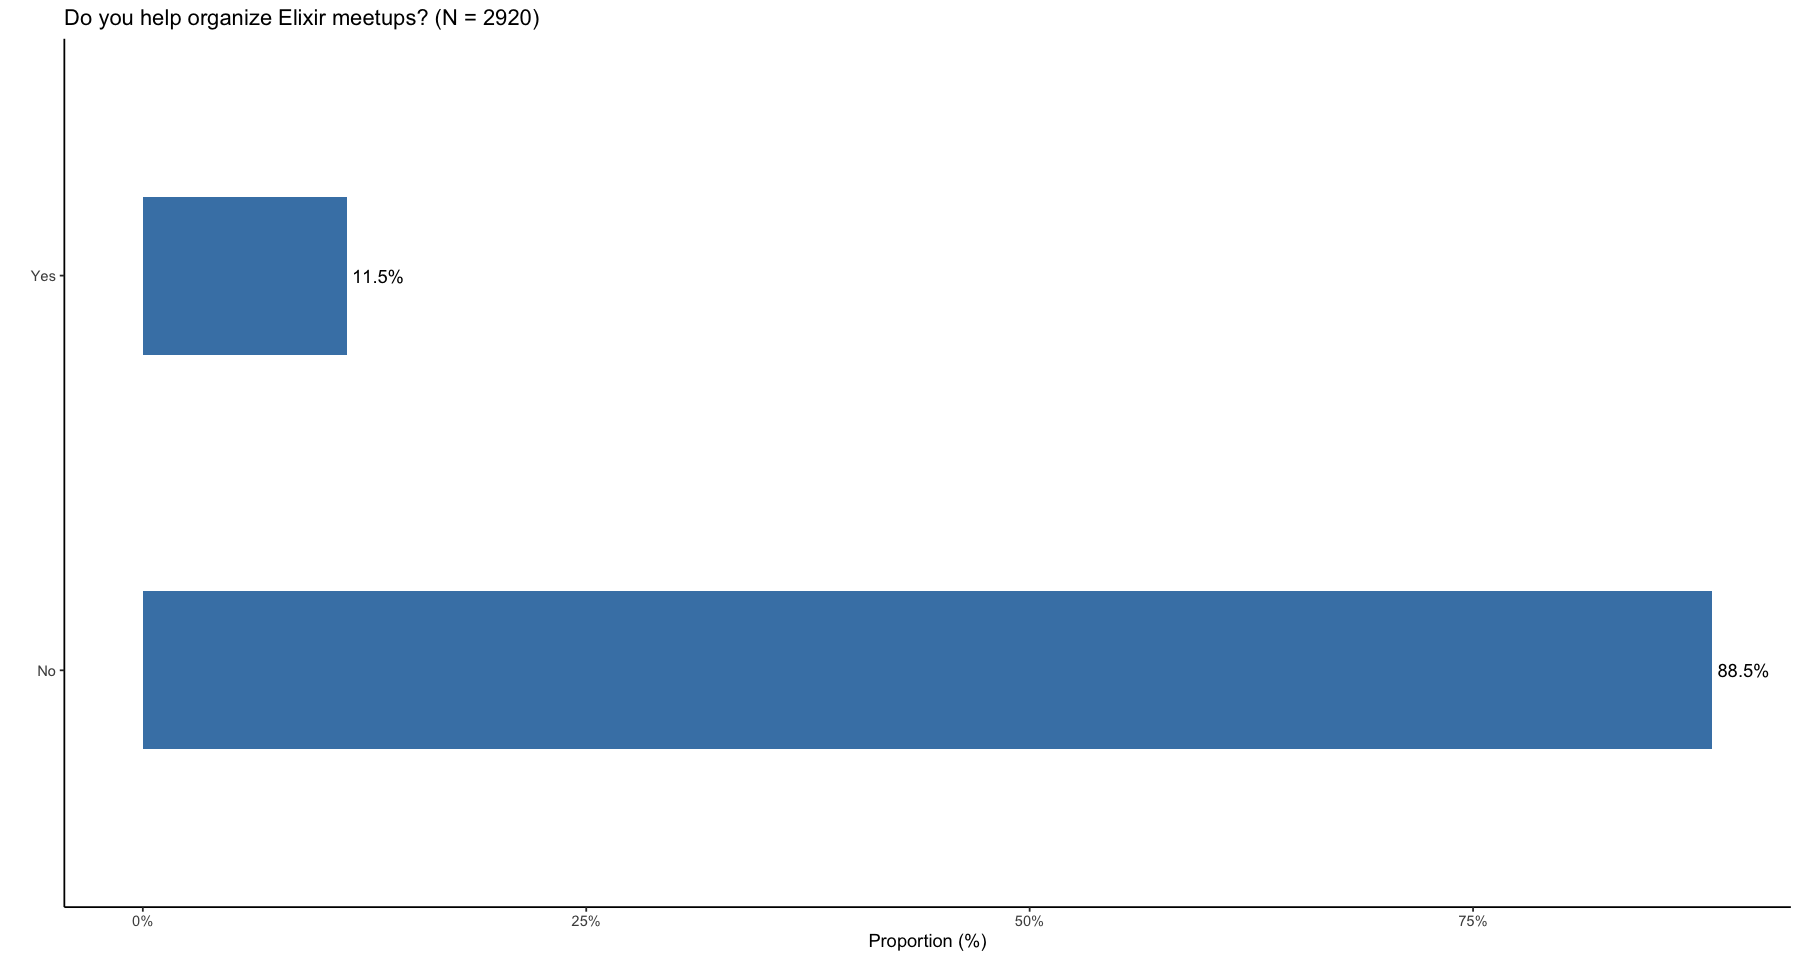


[[16]]


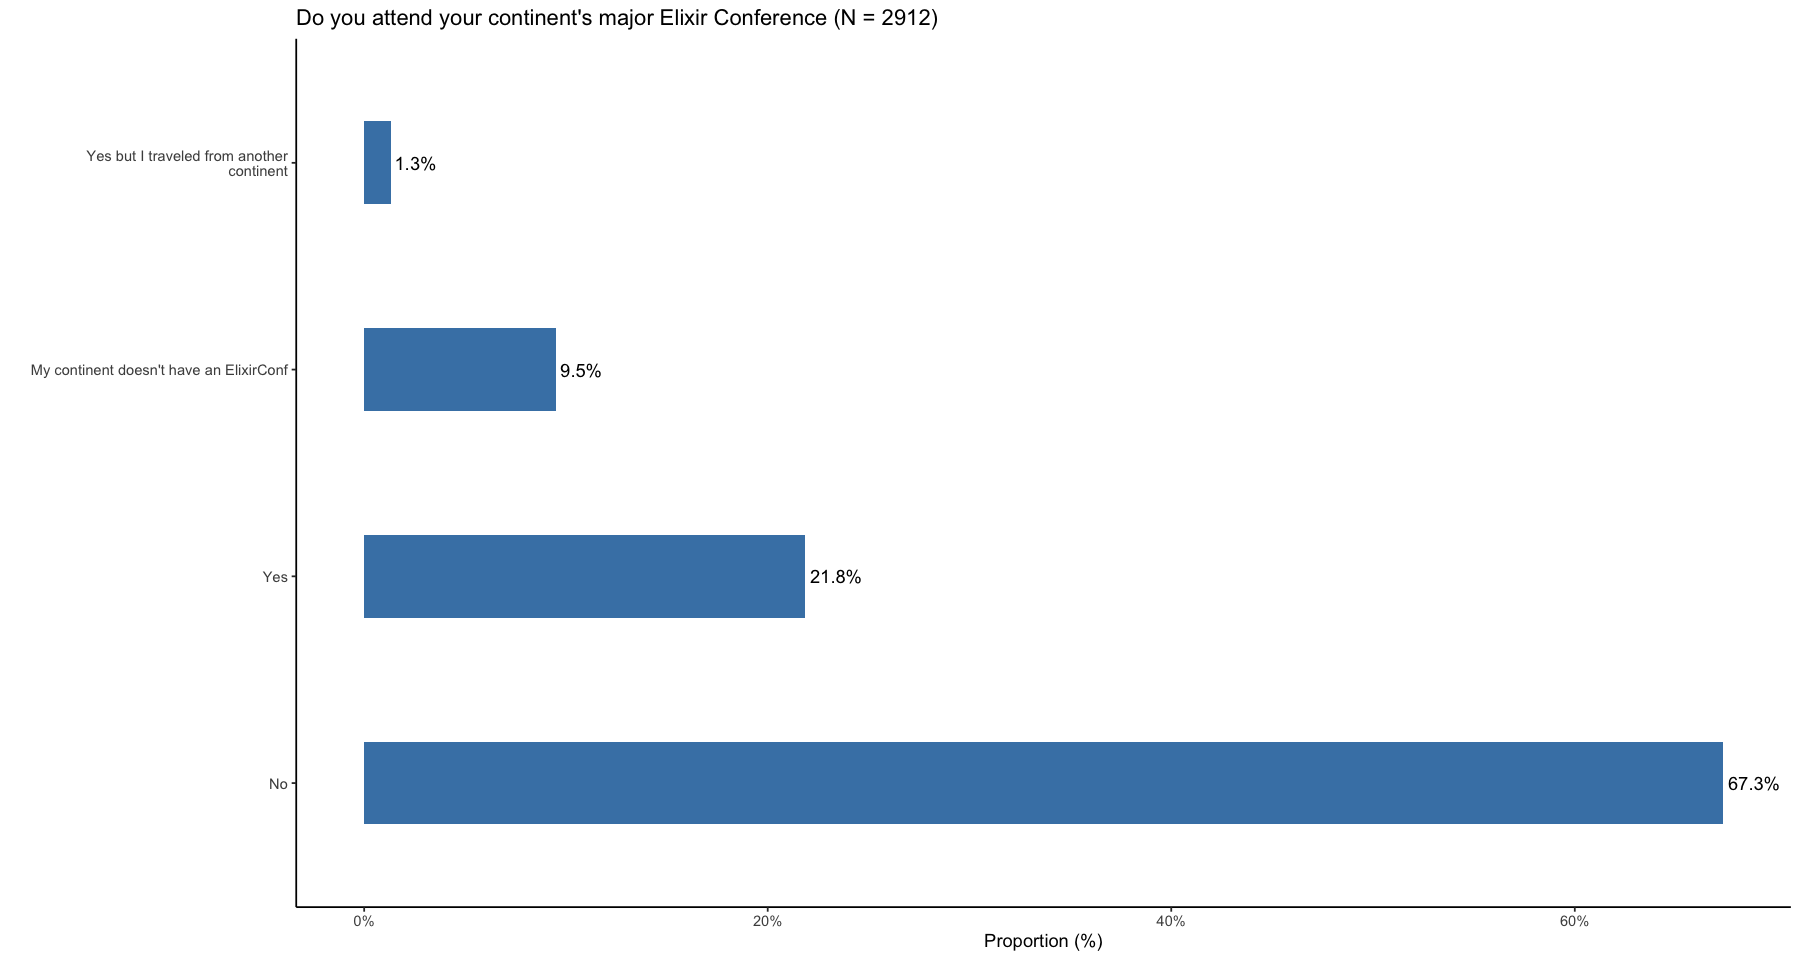


[[17]]


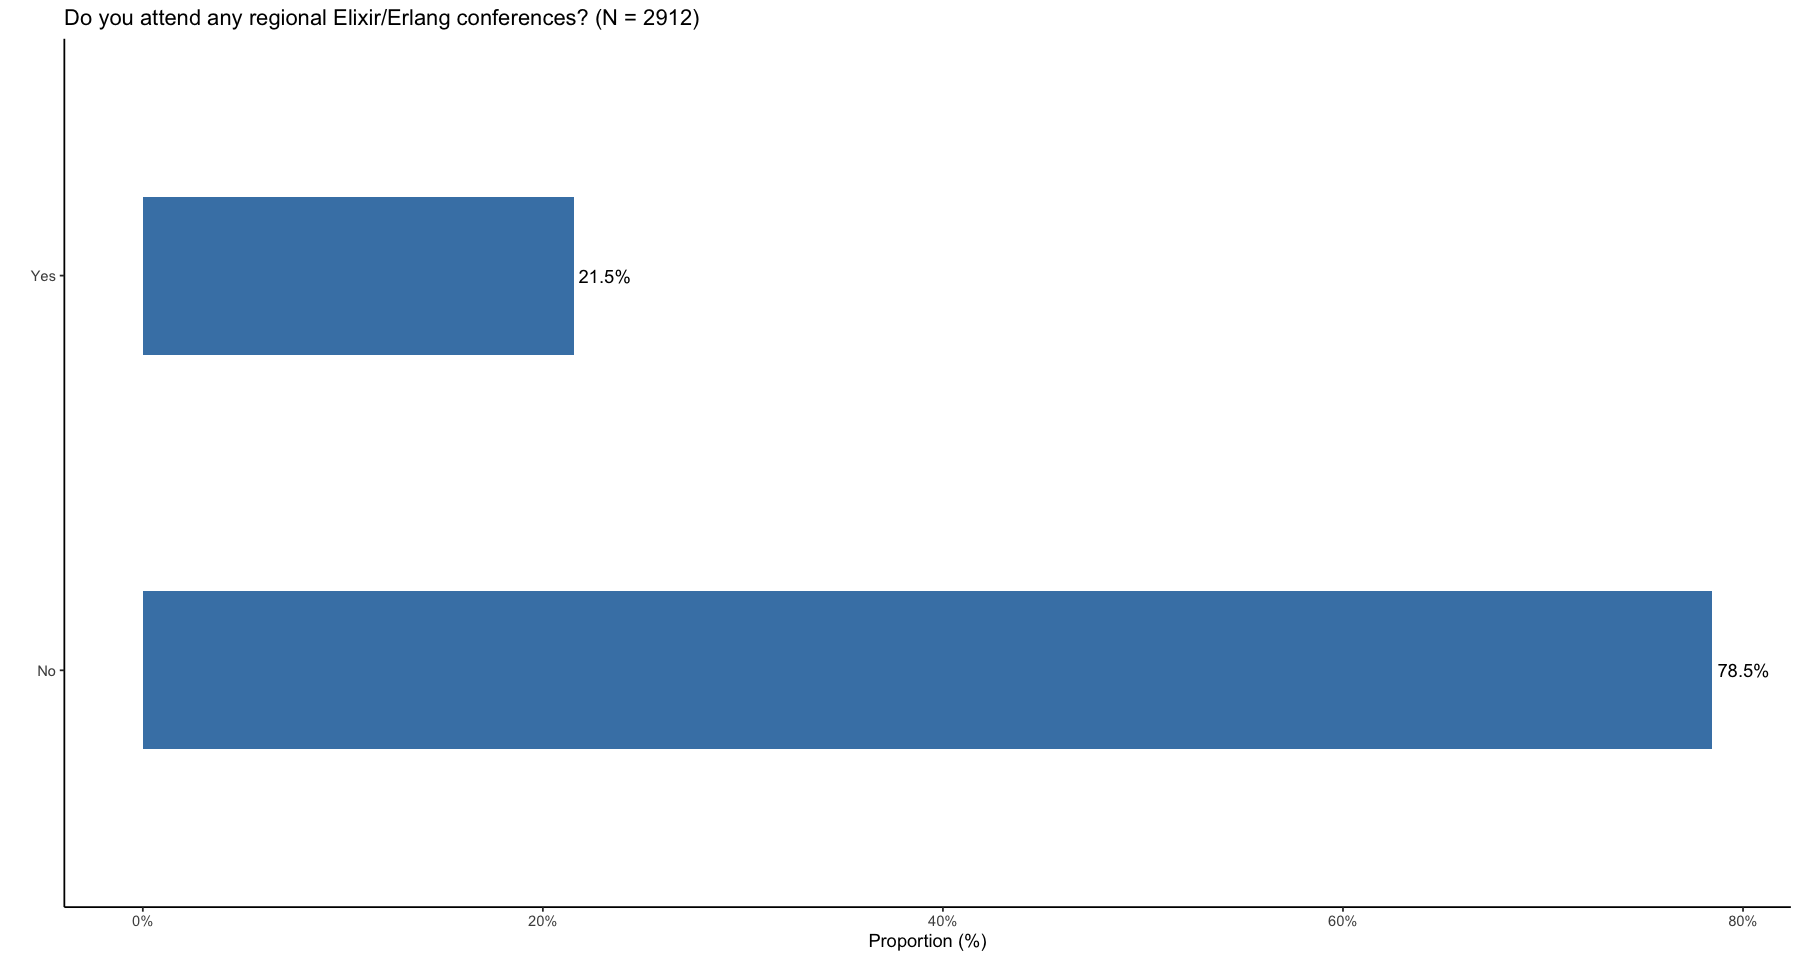


[[18]]


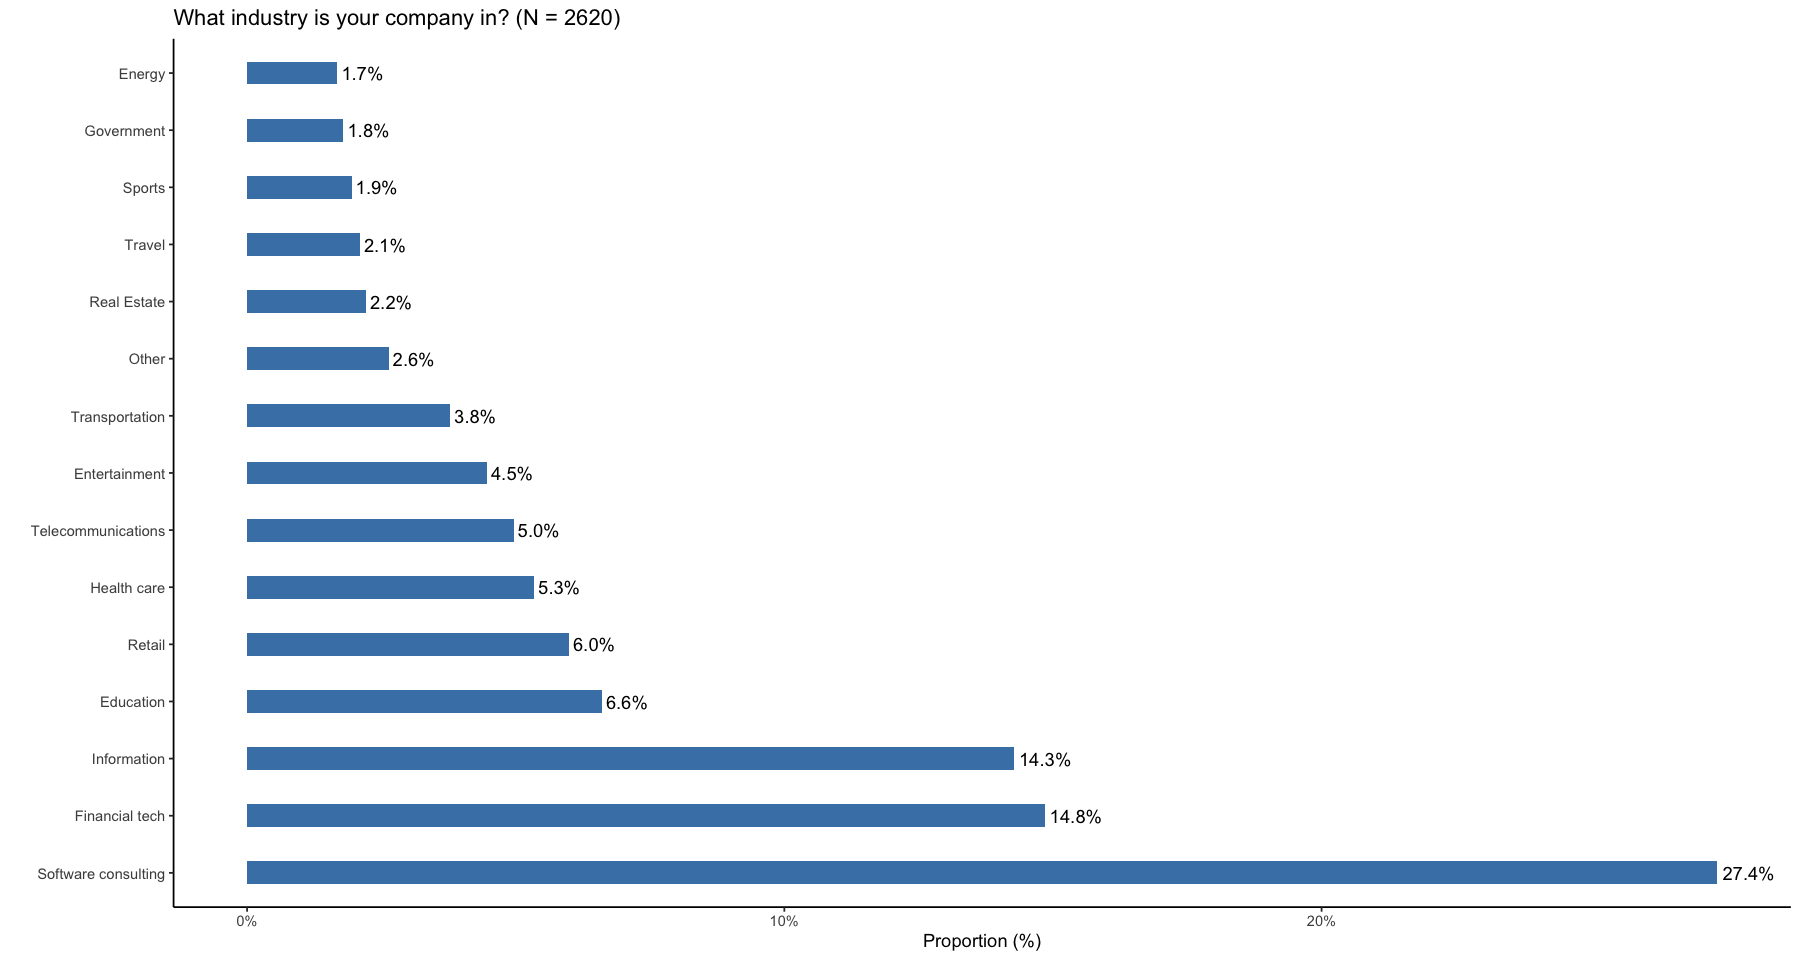


[[19]]


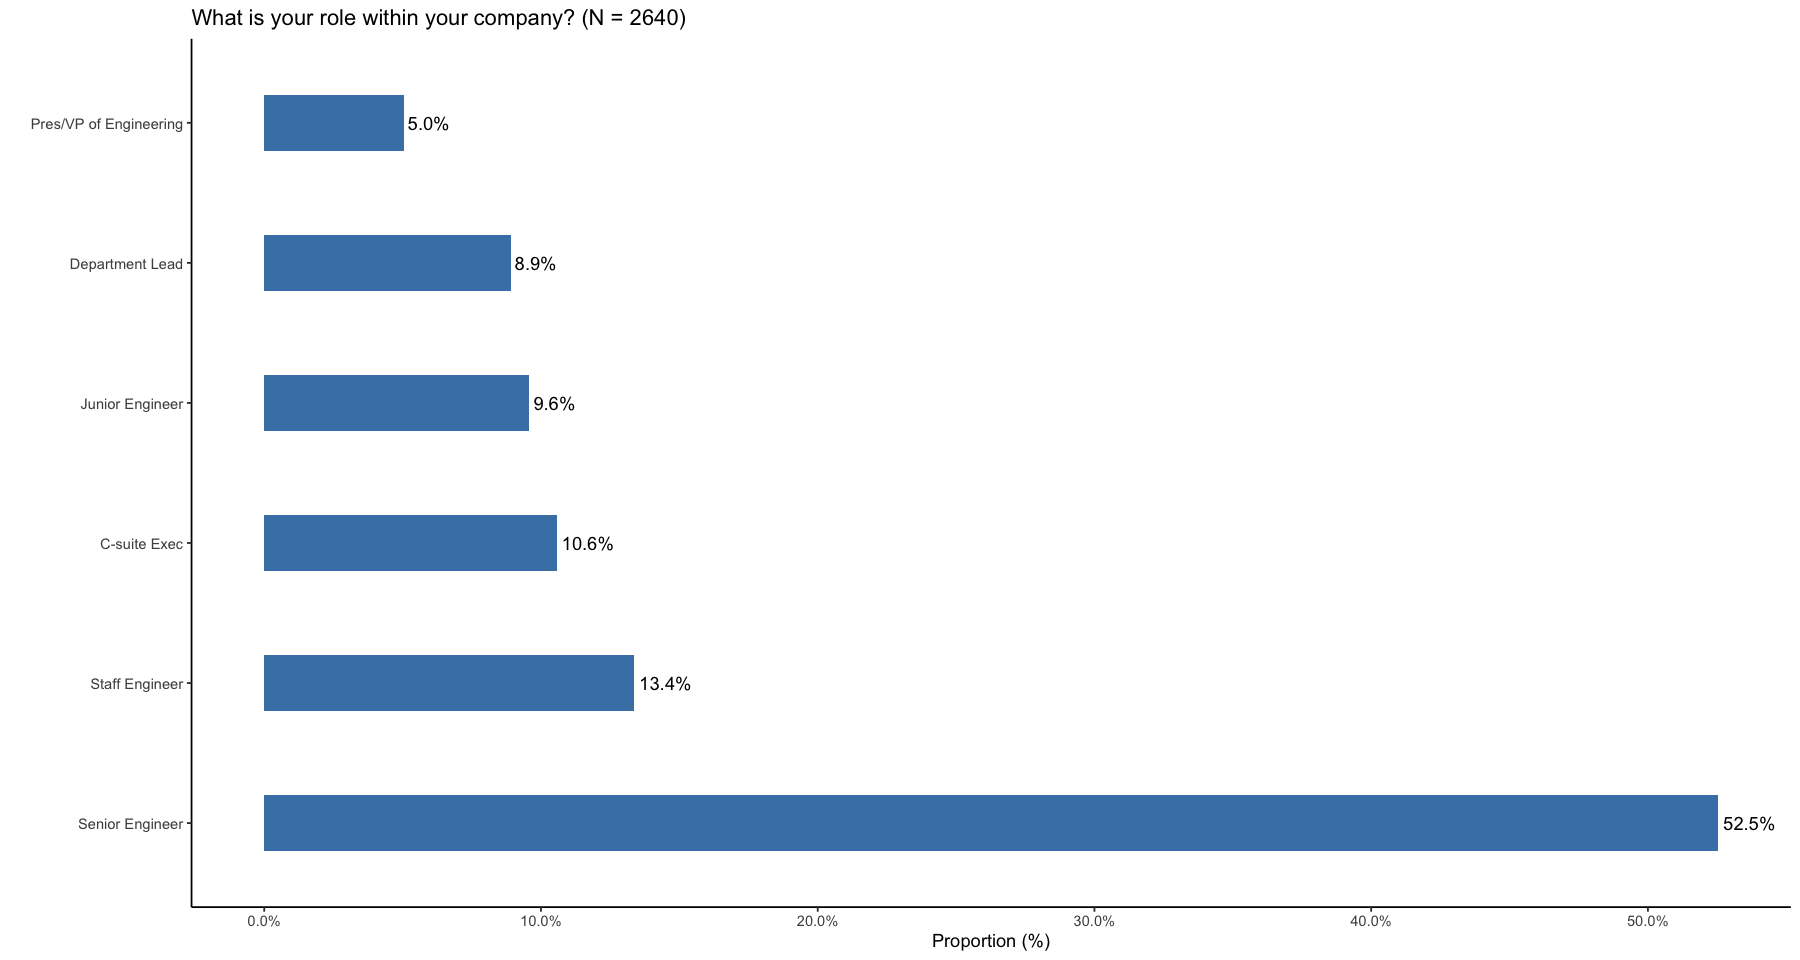


[[20]]


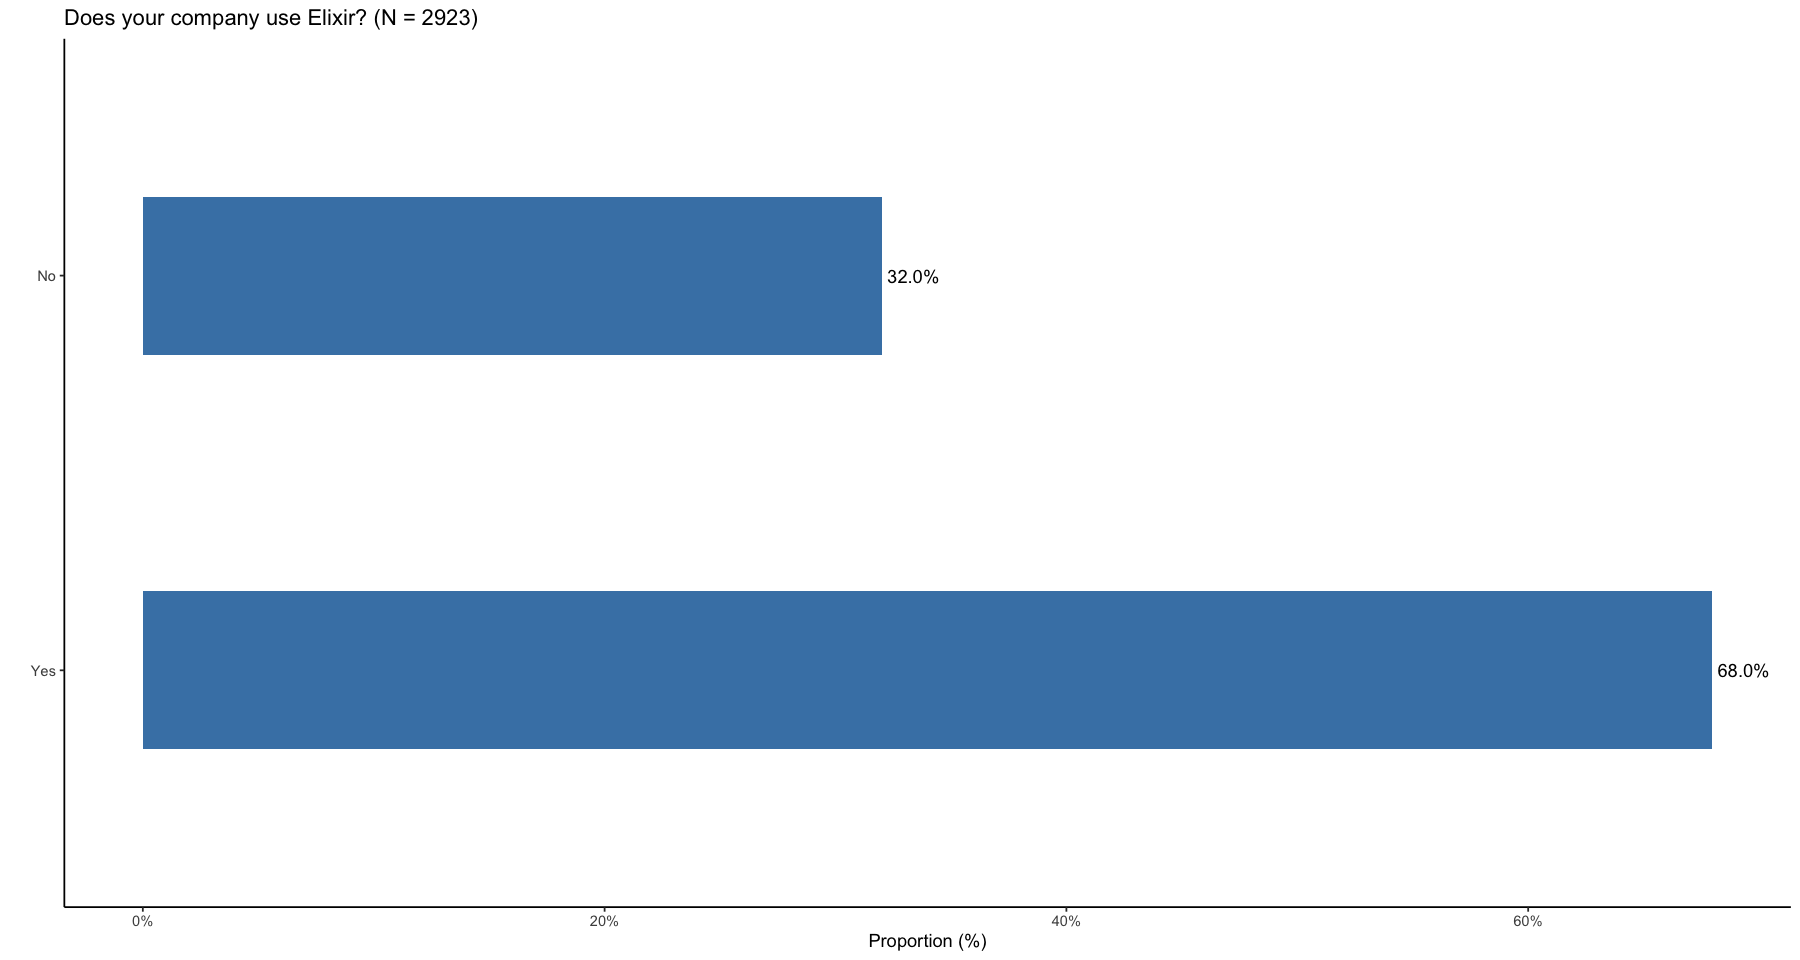


[[21]]


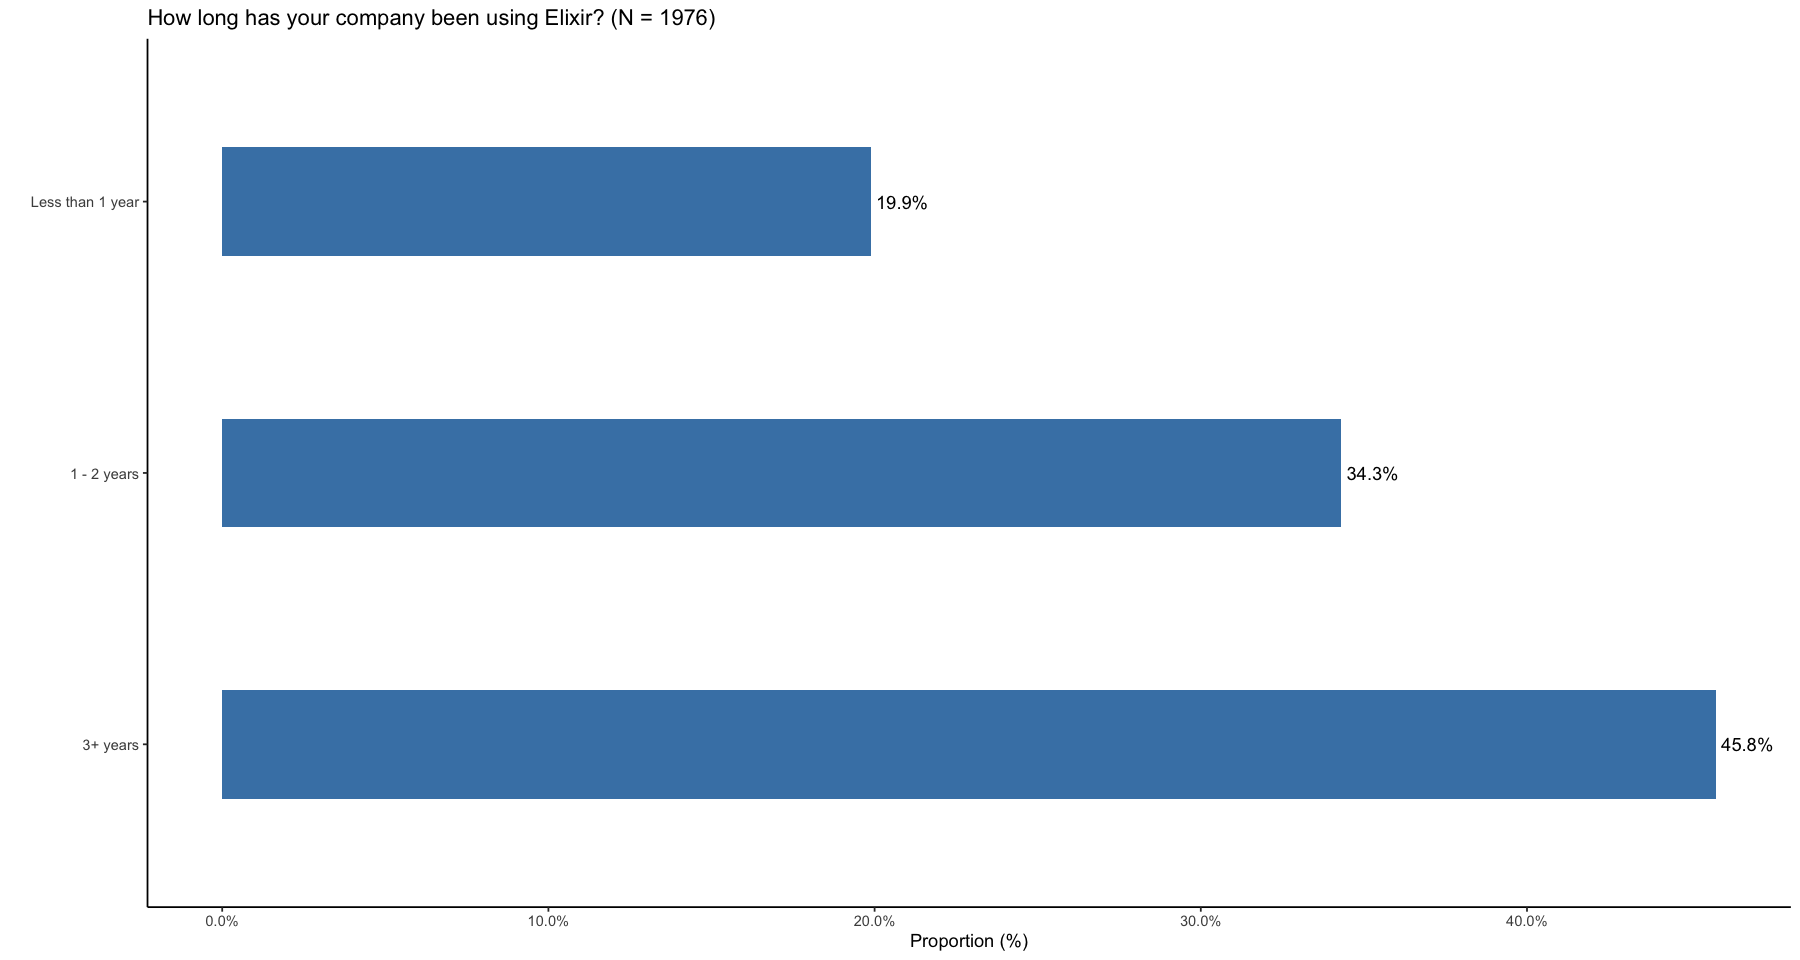


[[22]]


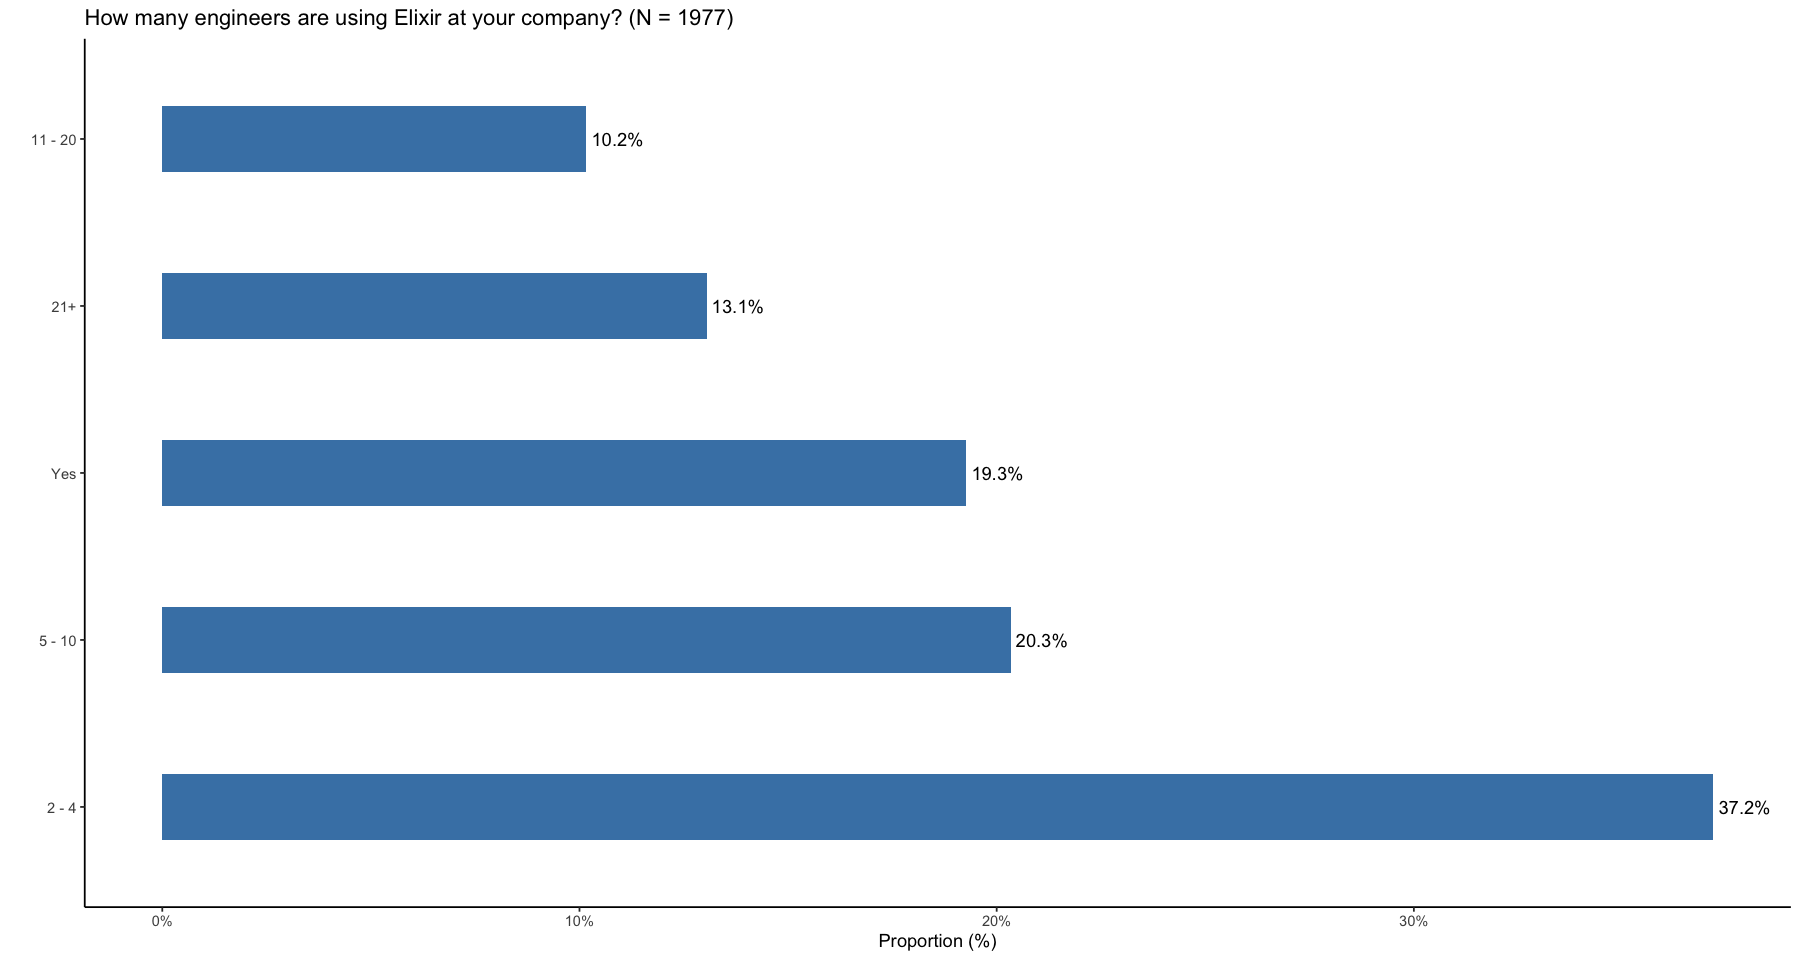


[[23]]


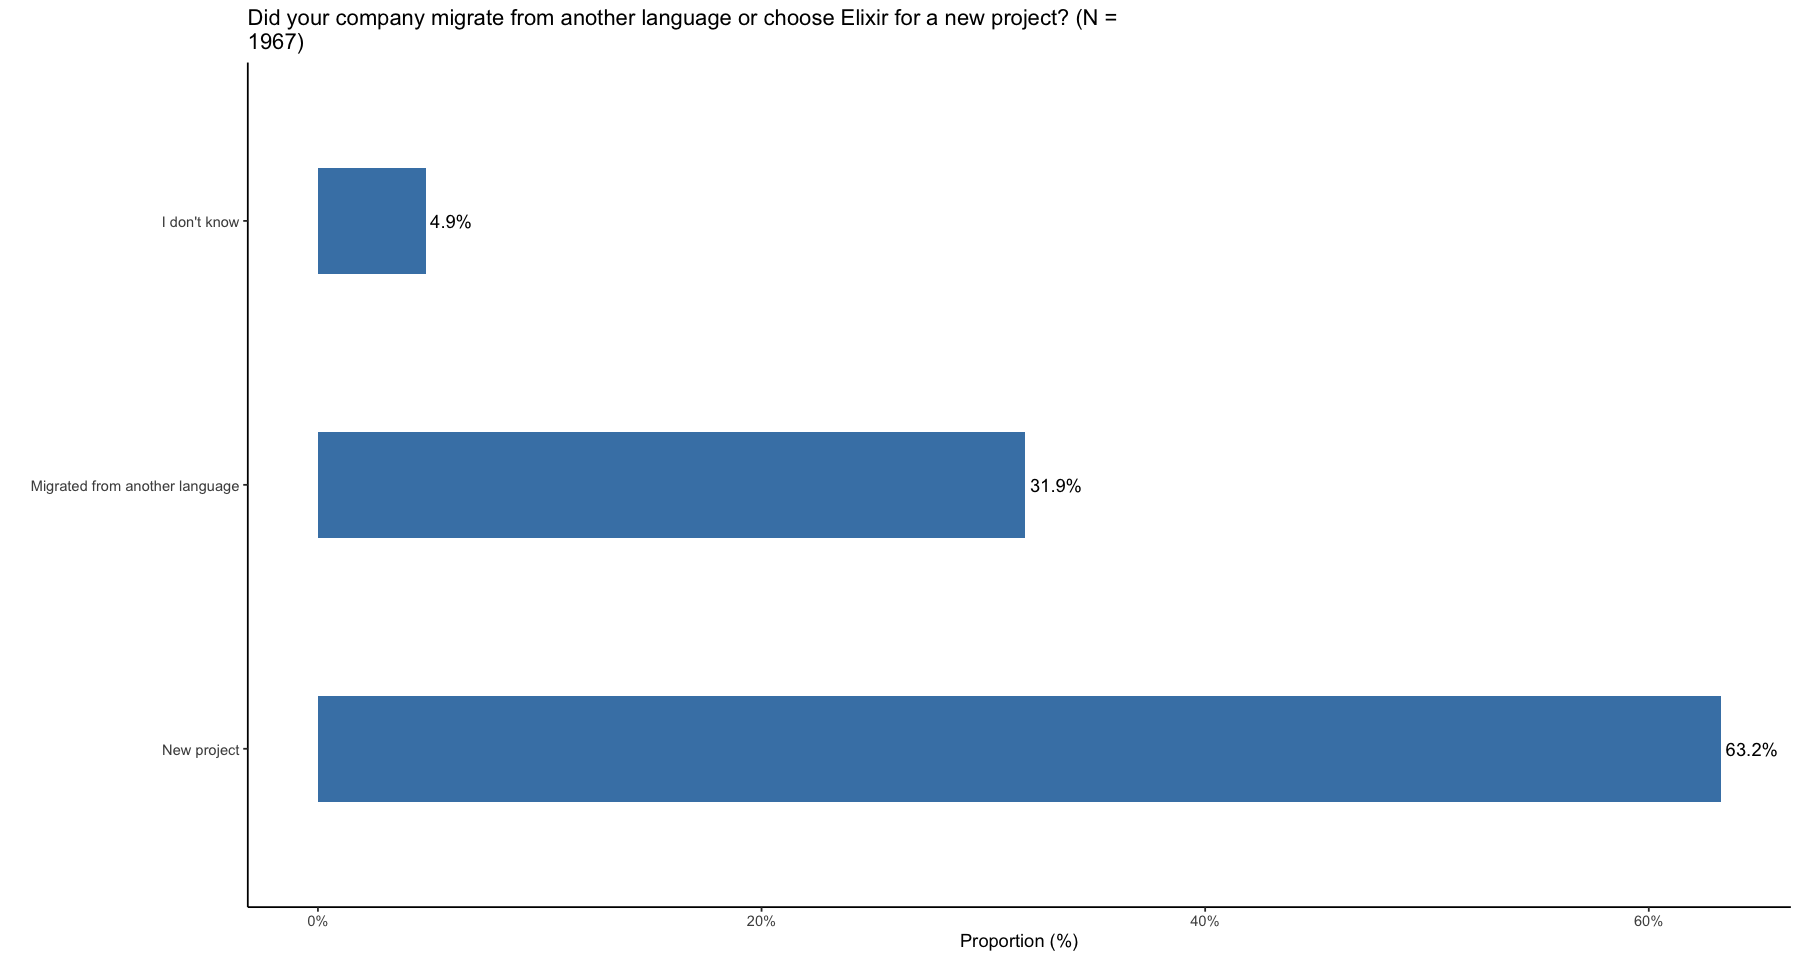


[[24]]


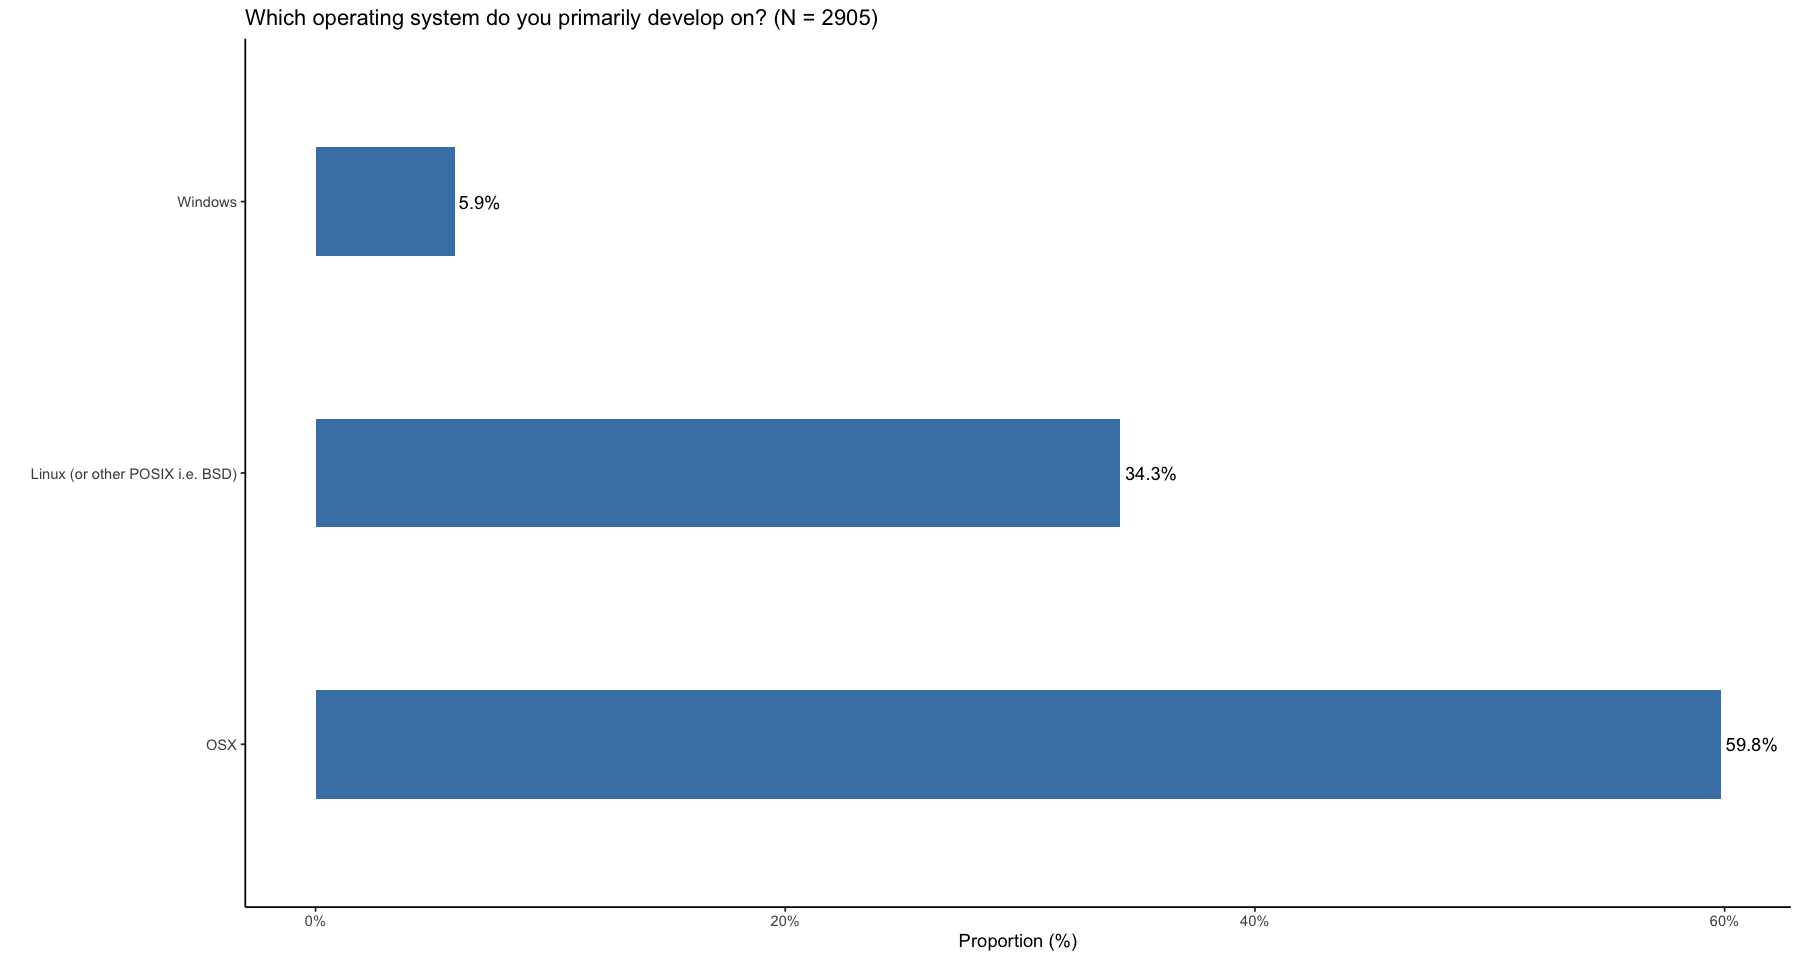


[[25]]


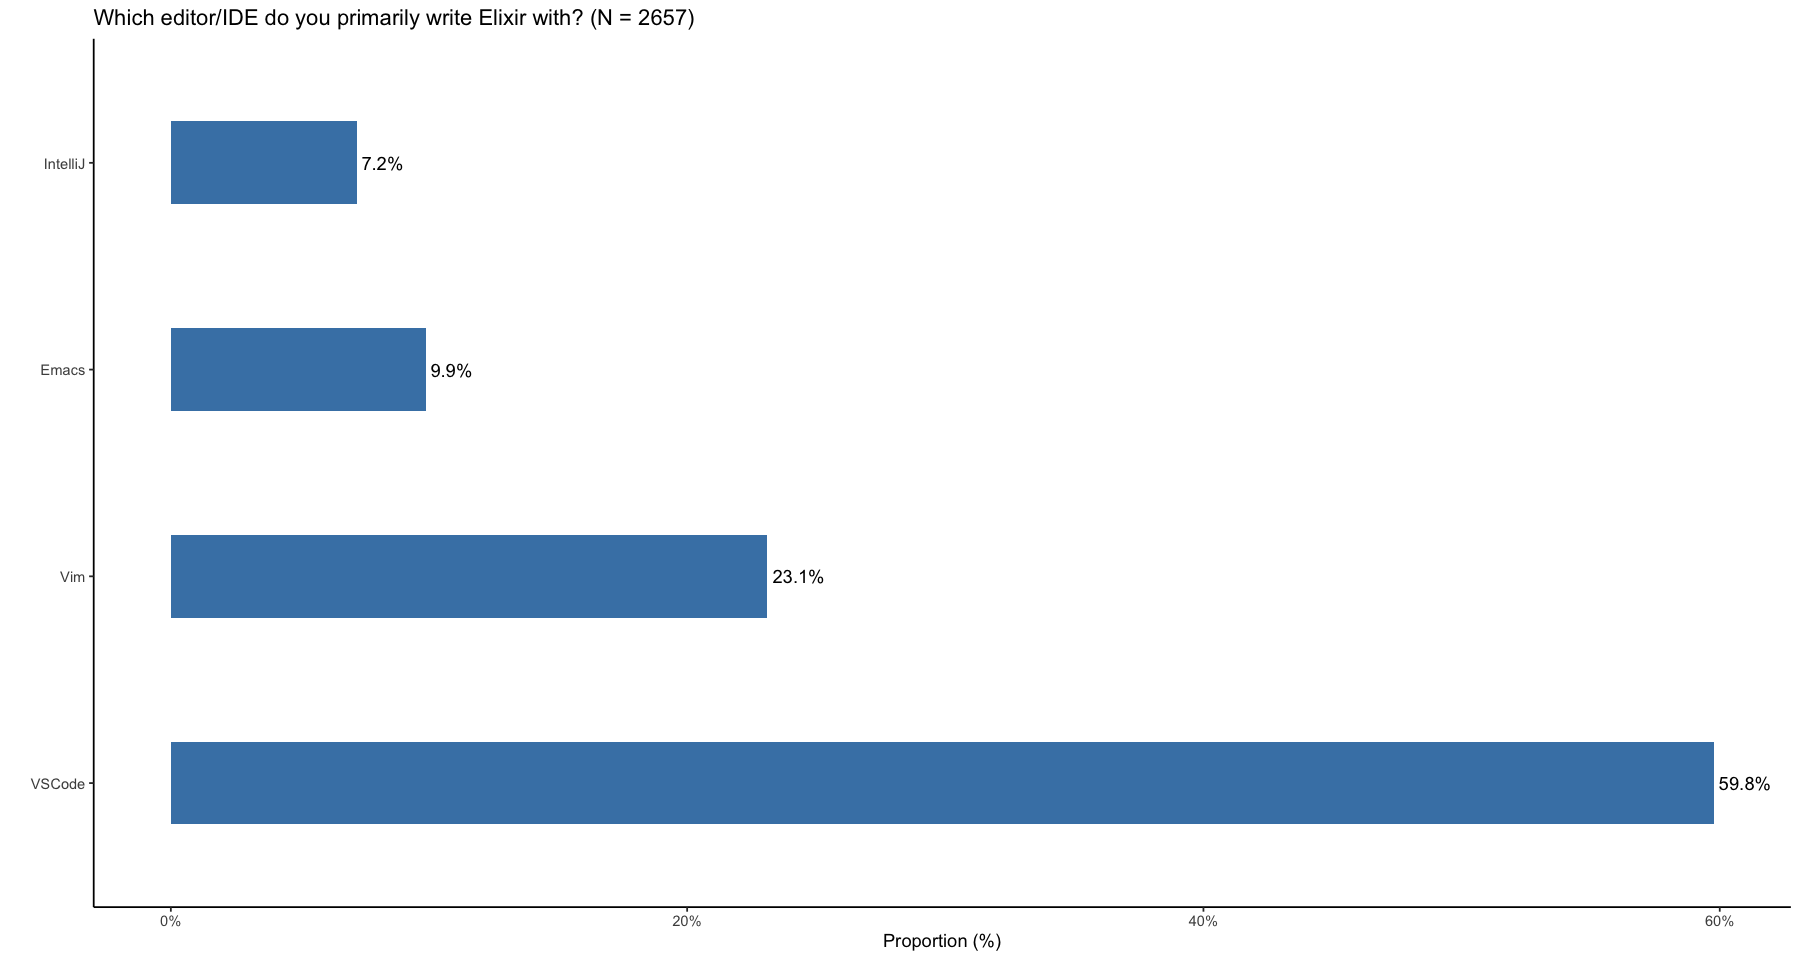


[[26]]


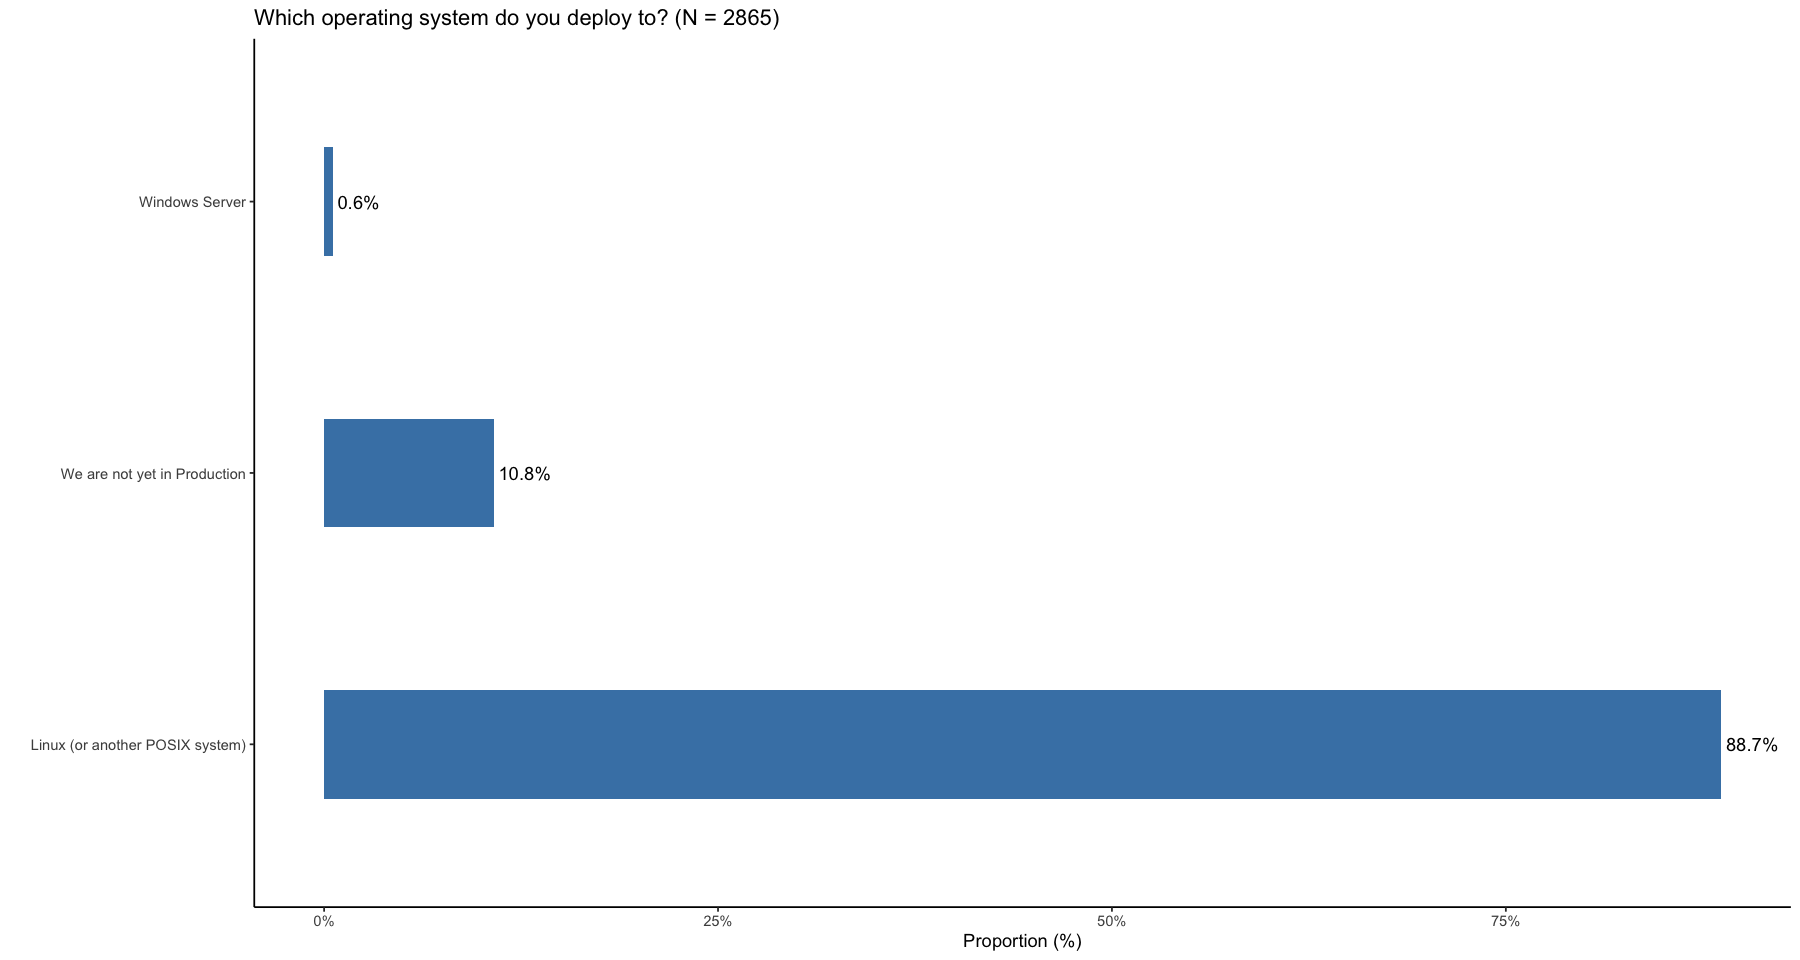


[[27]]


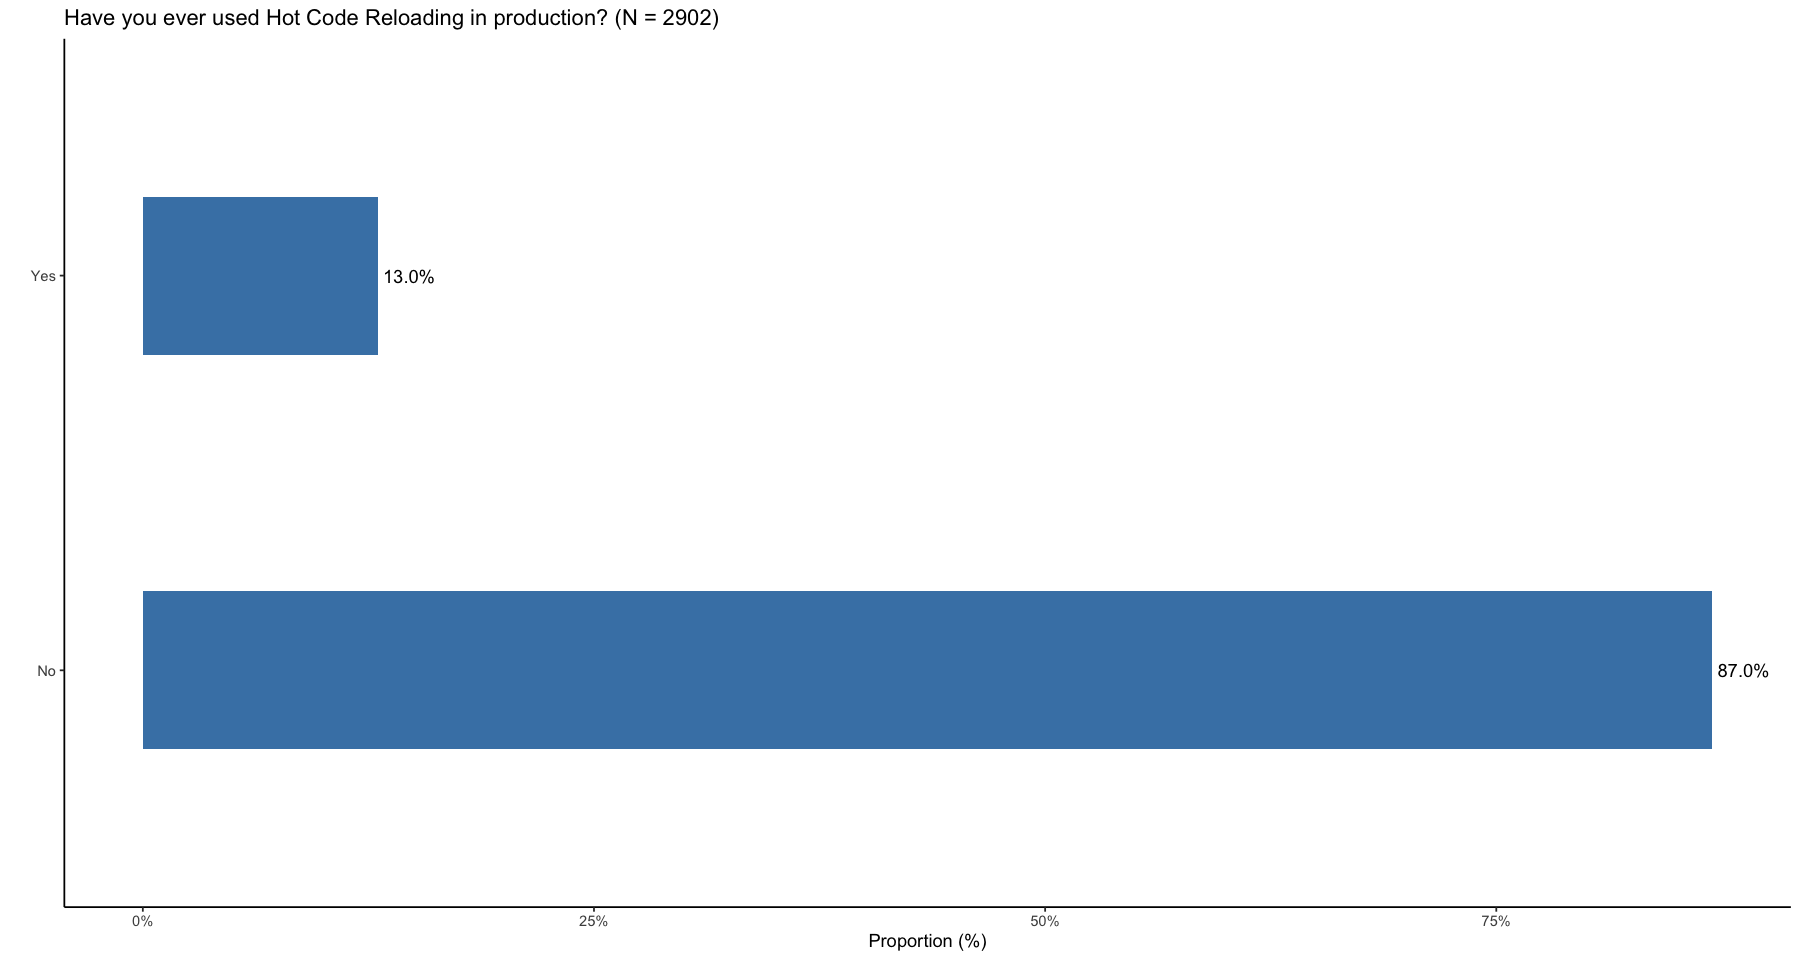


[[28]]


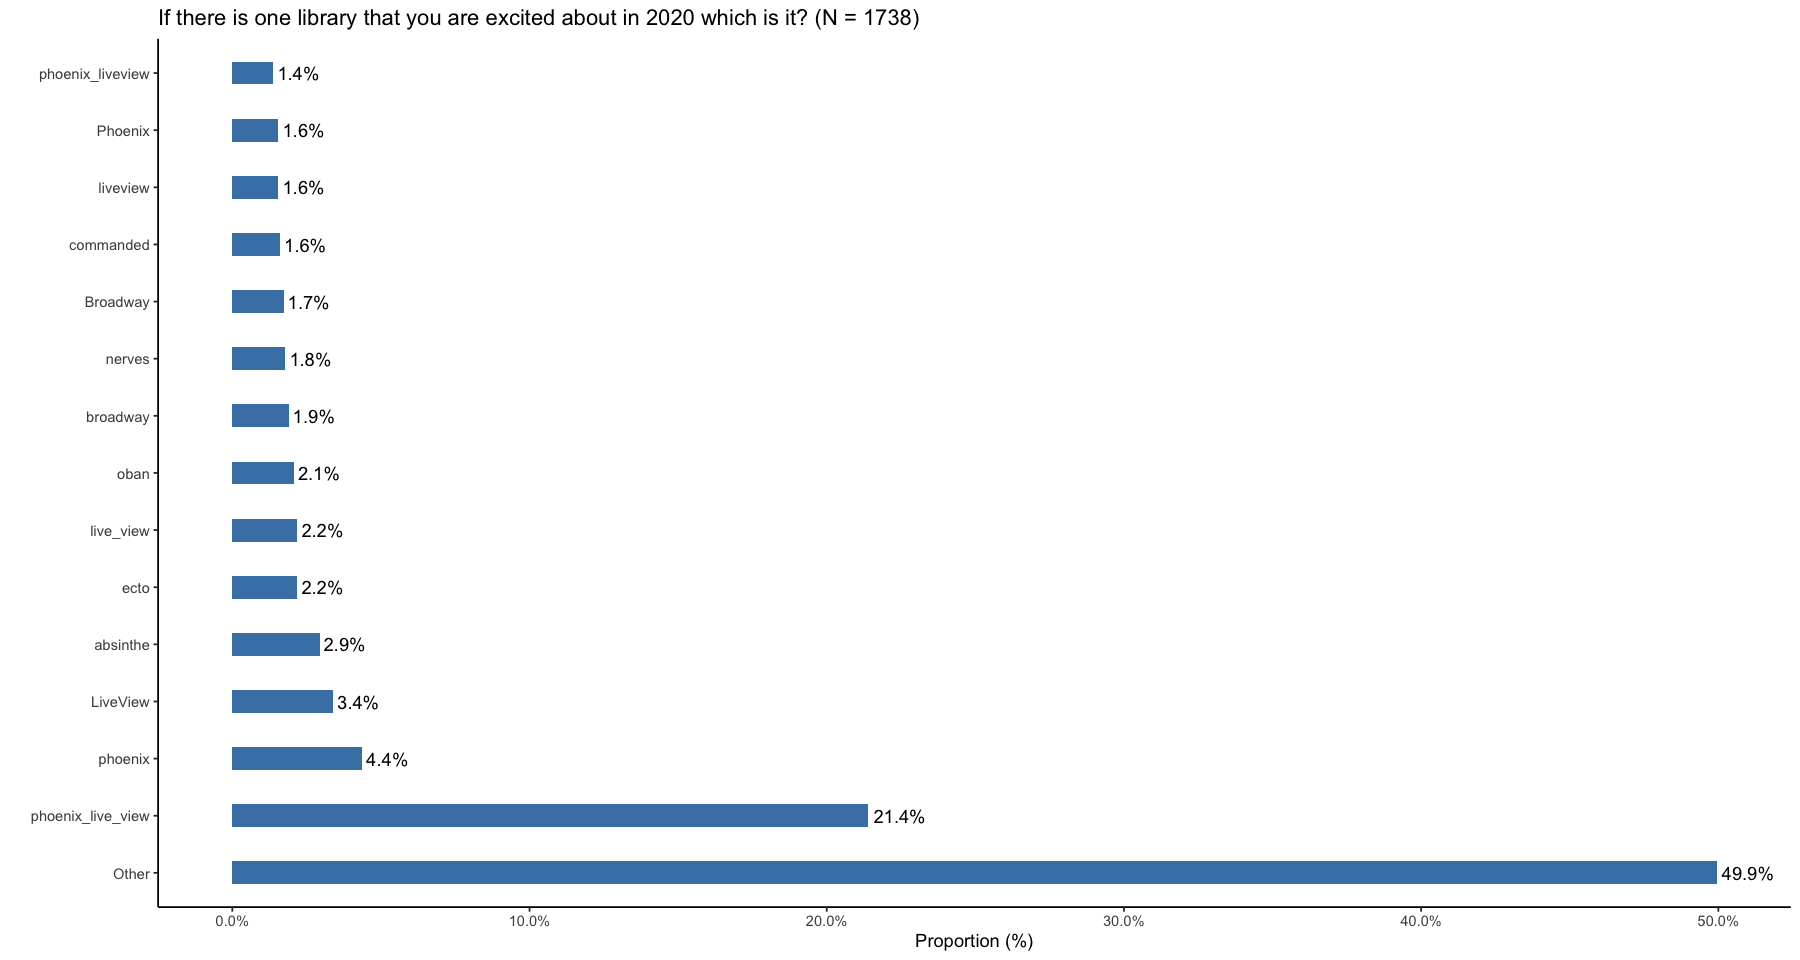


[[29]]


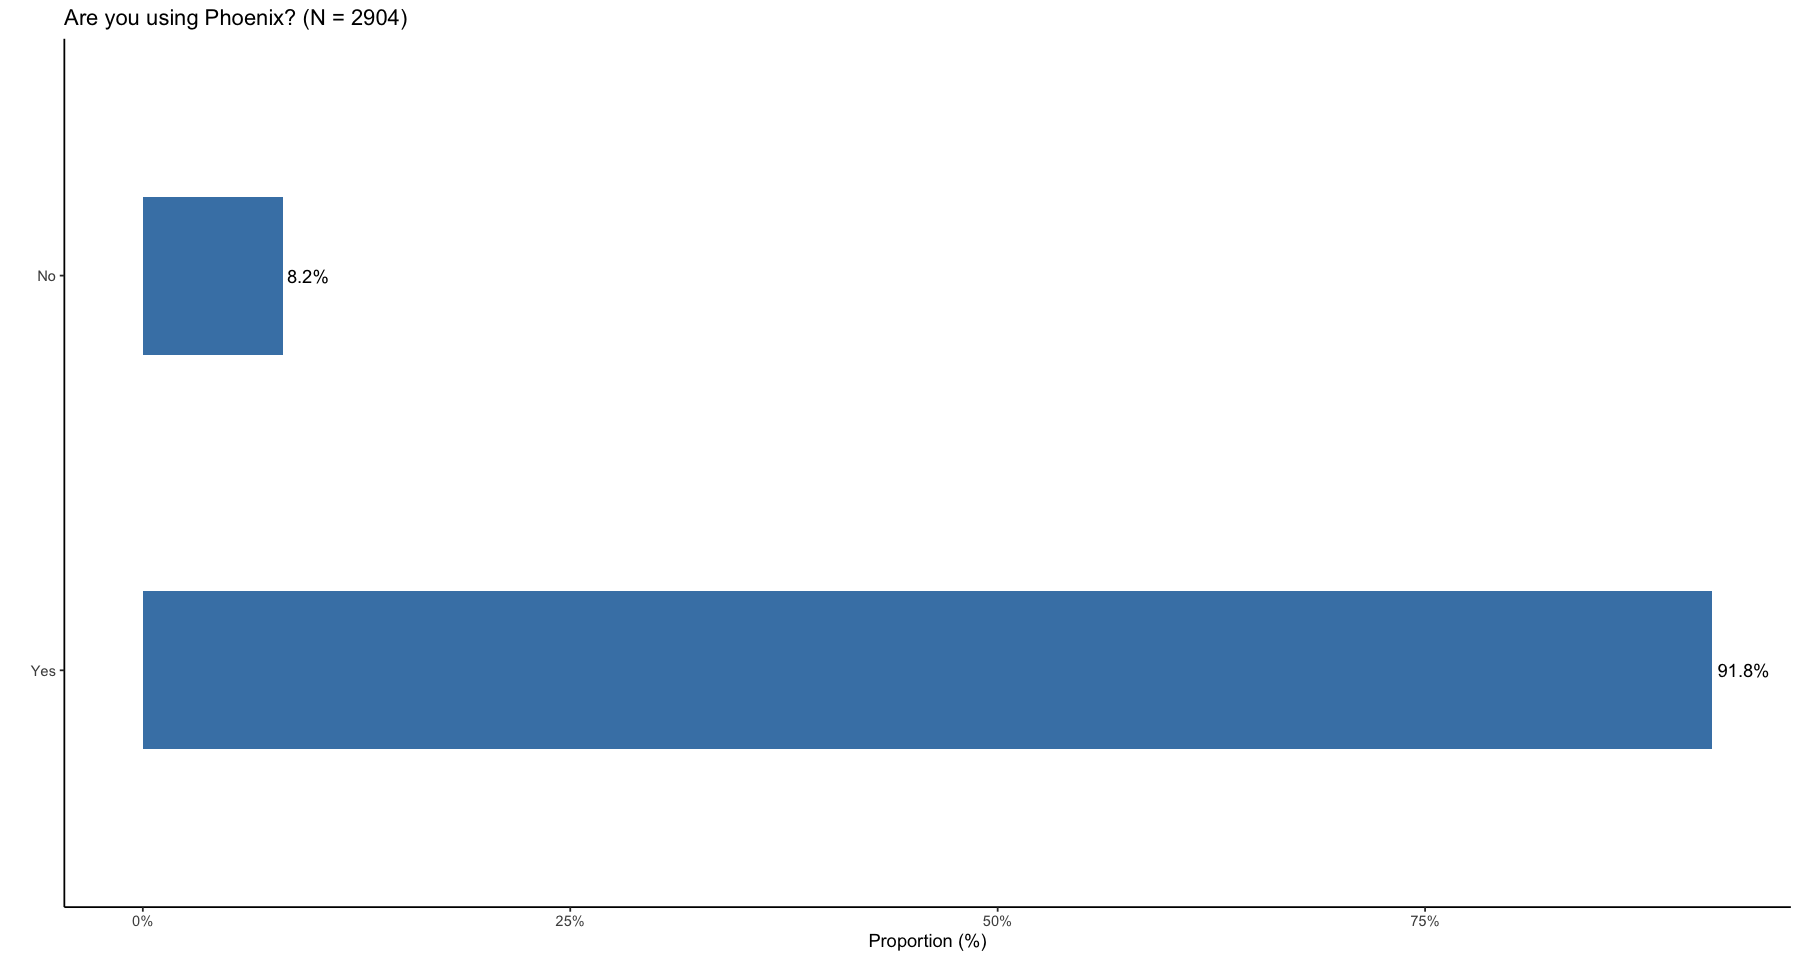


[[30]]


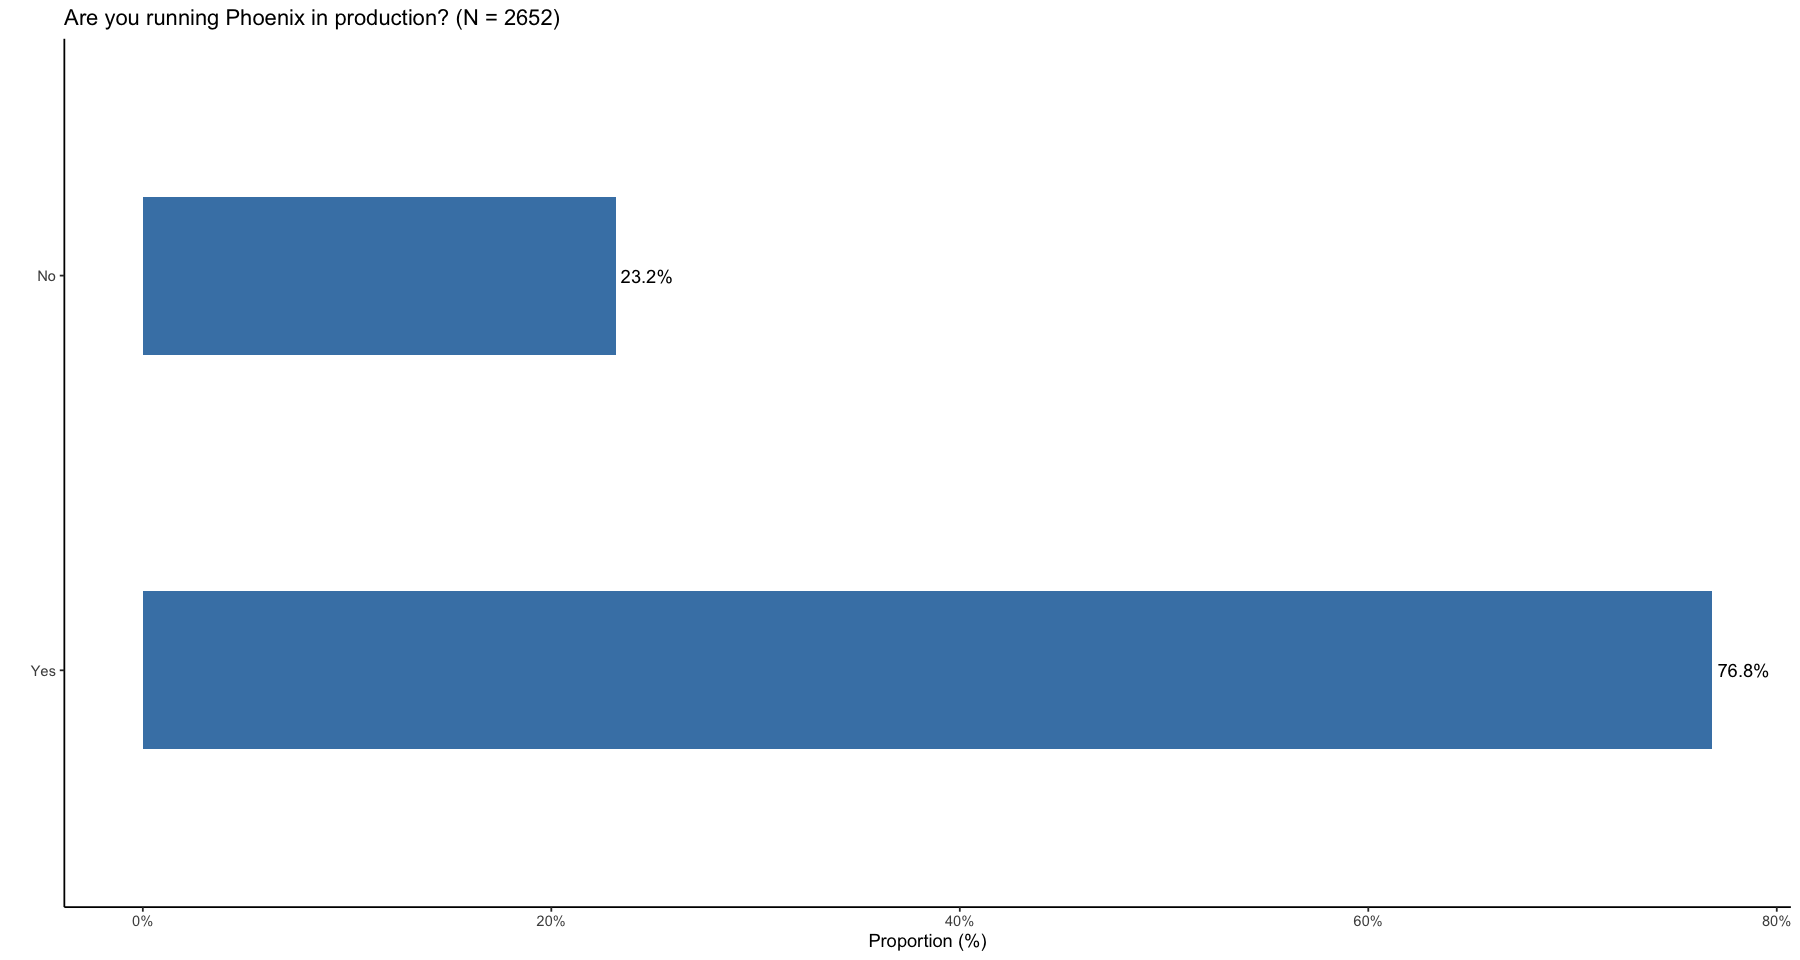


[[31]]


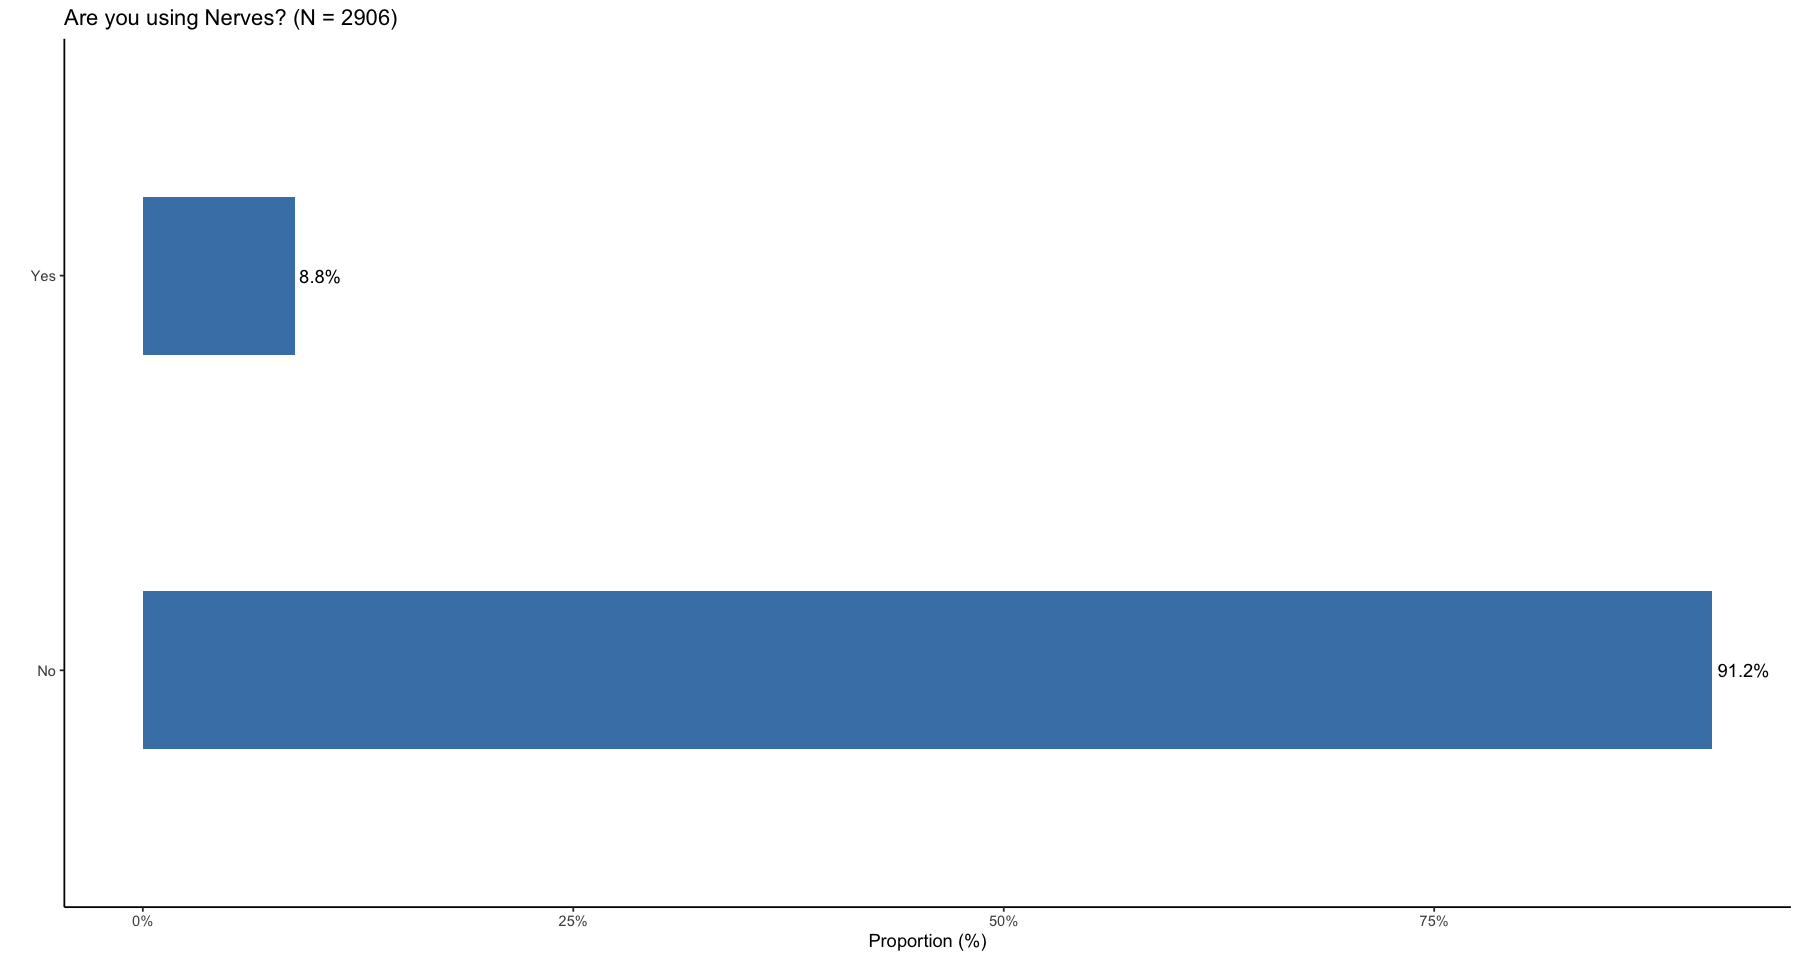


[[32]]


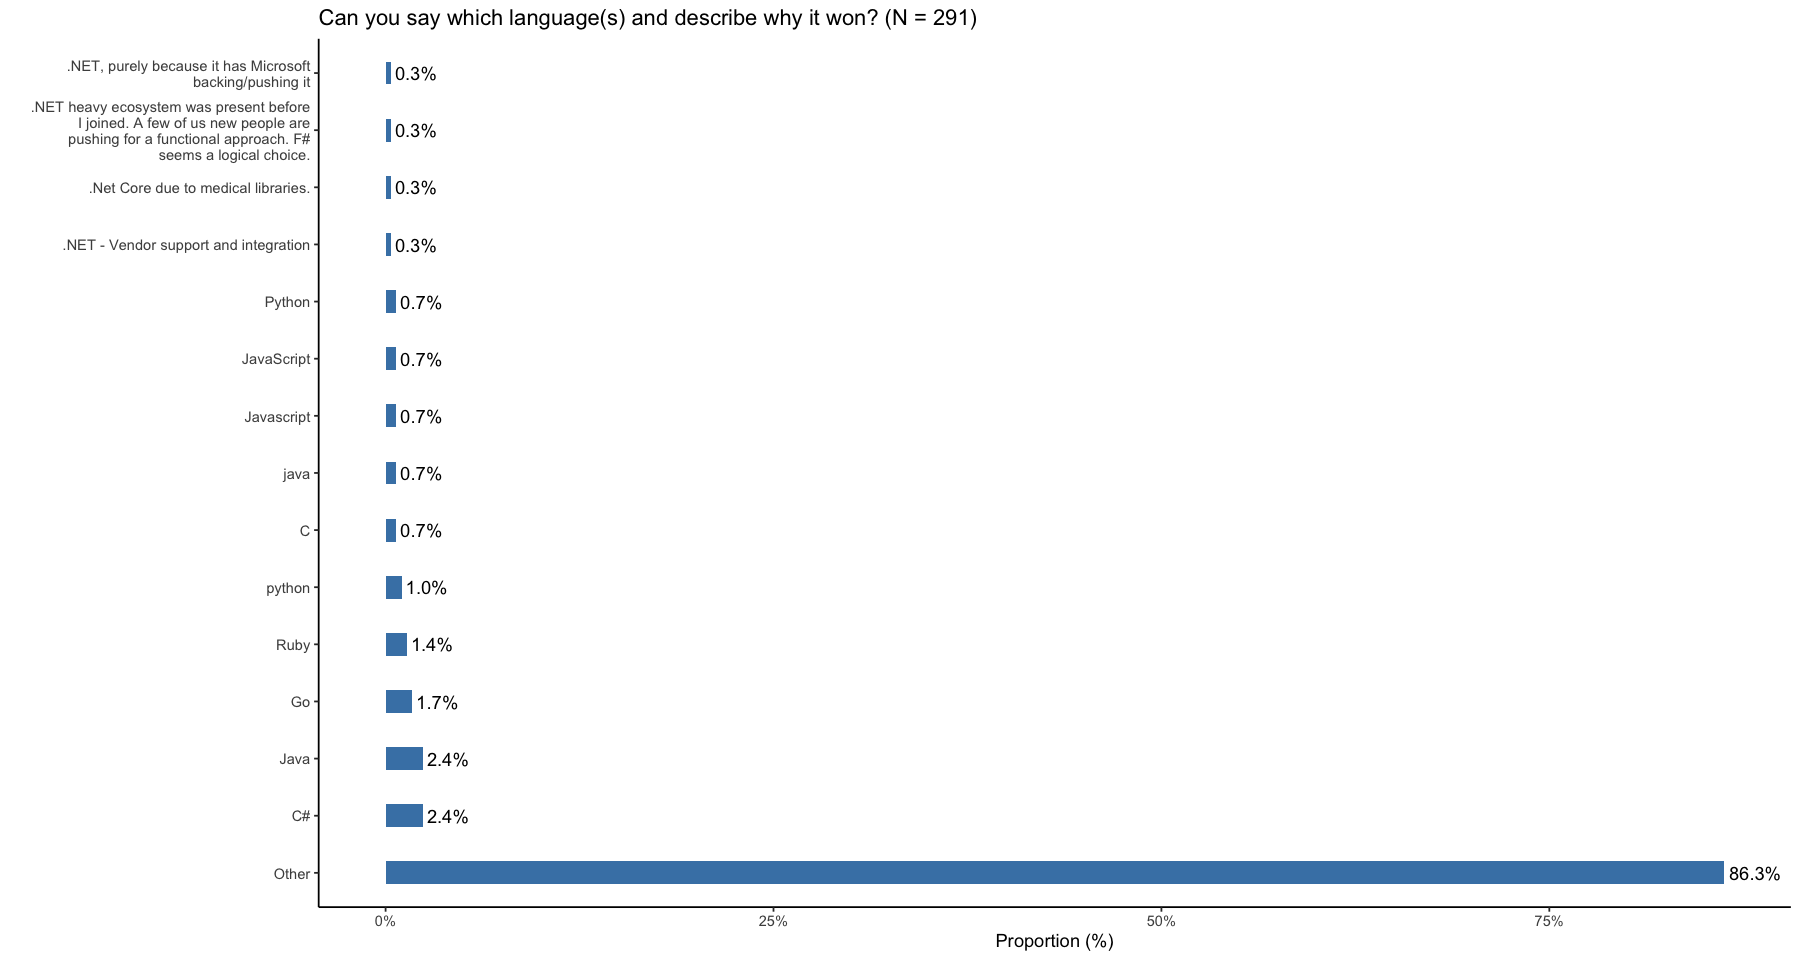


[[33]]


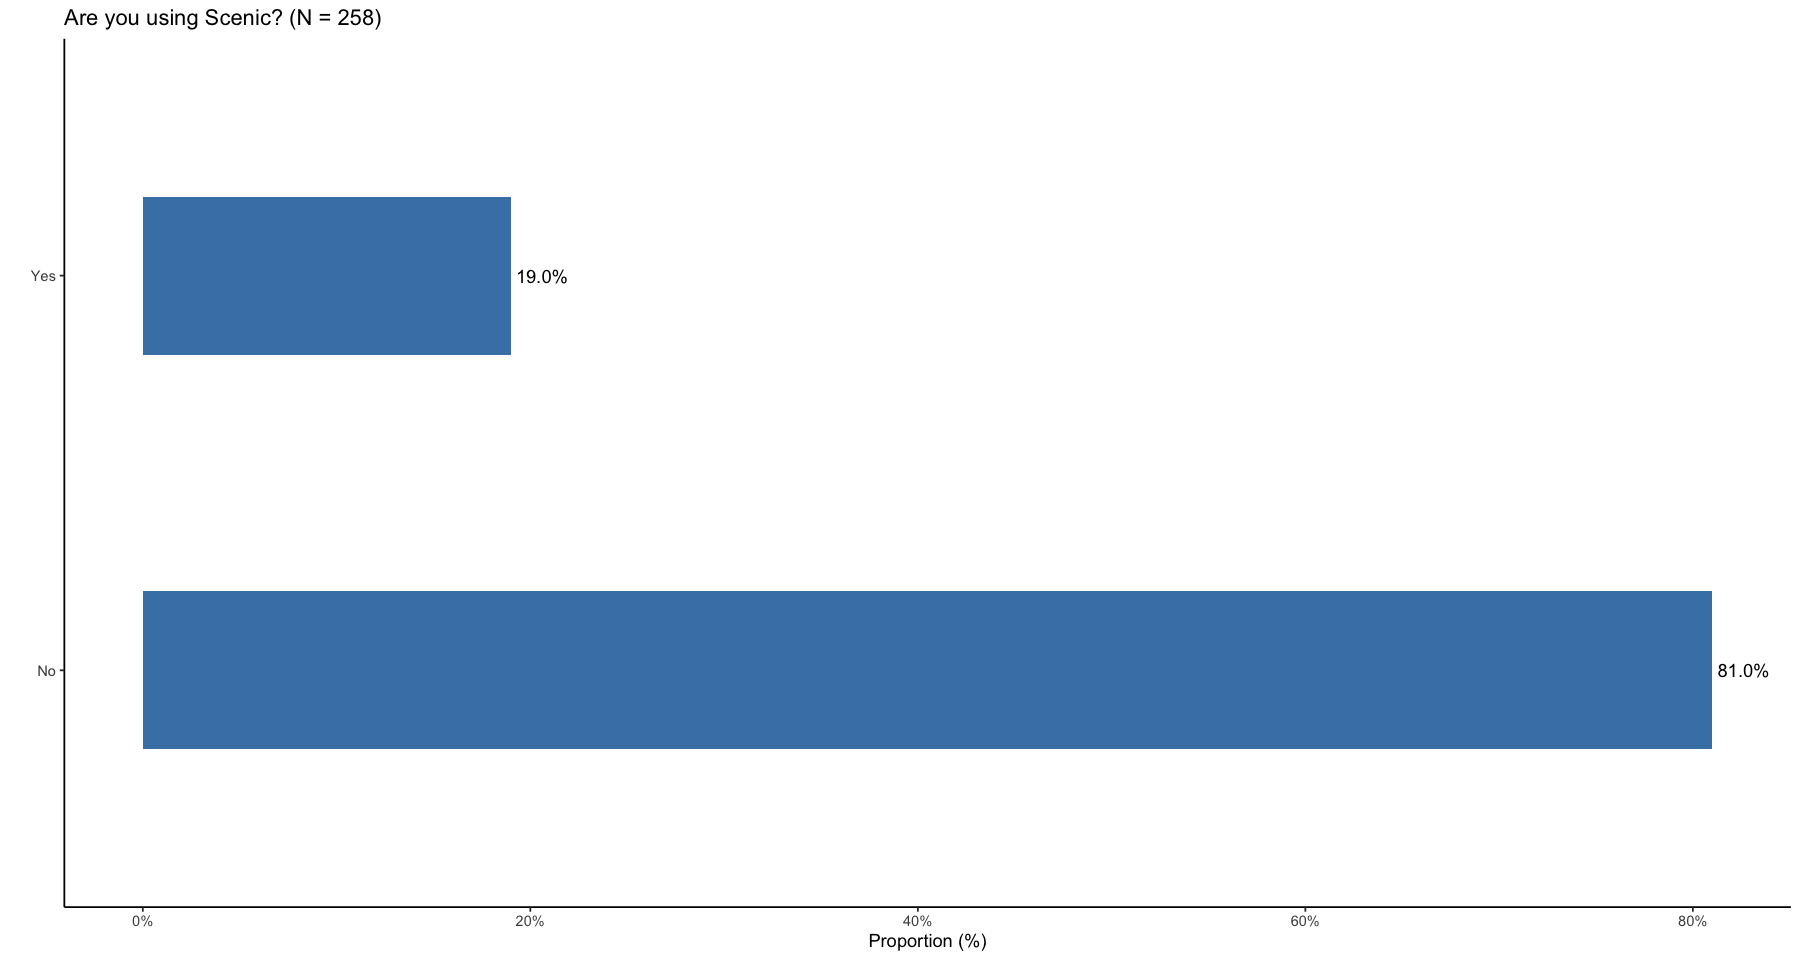


[[34]]


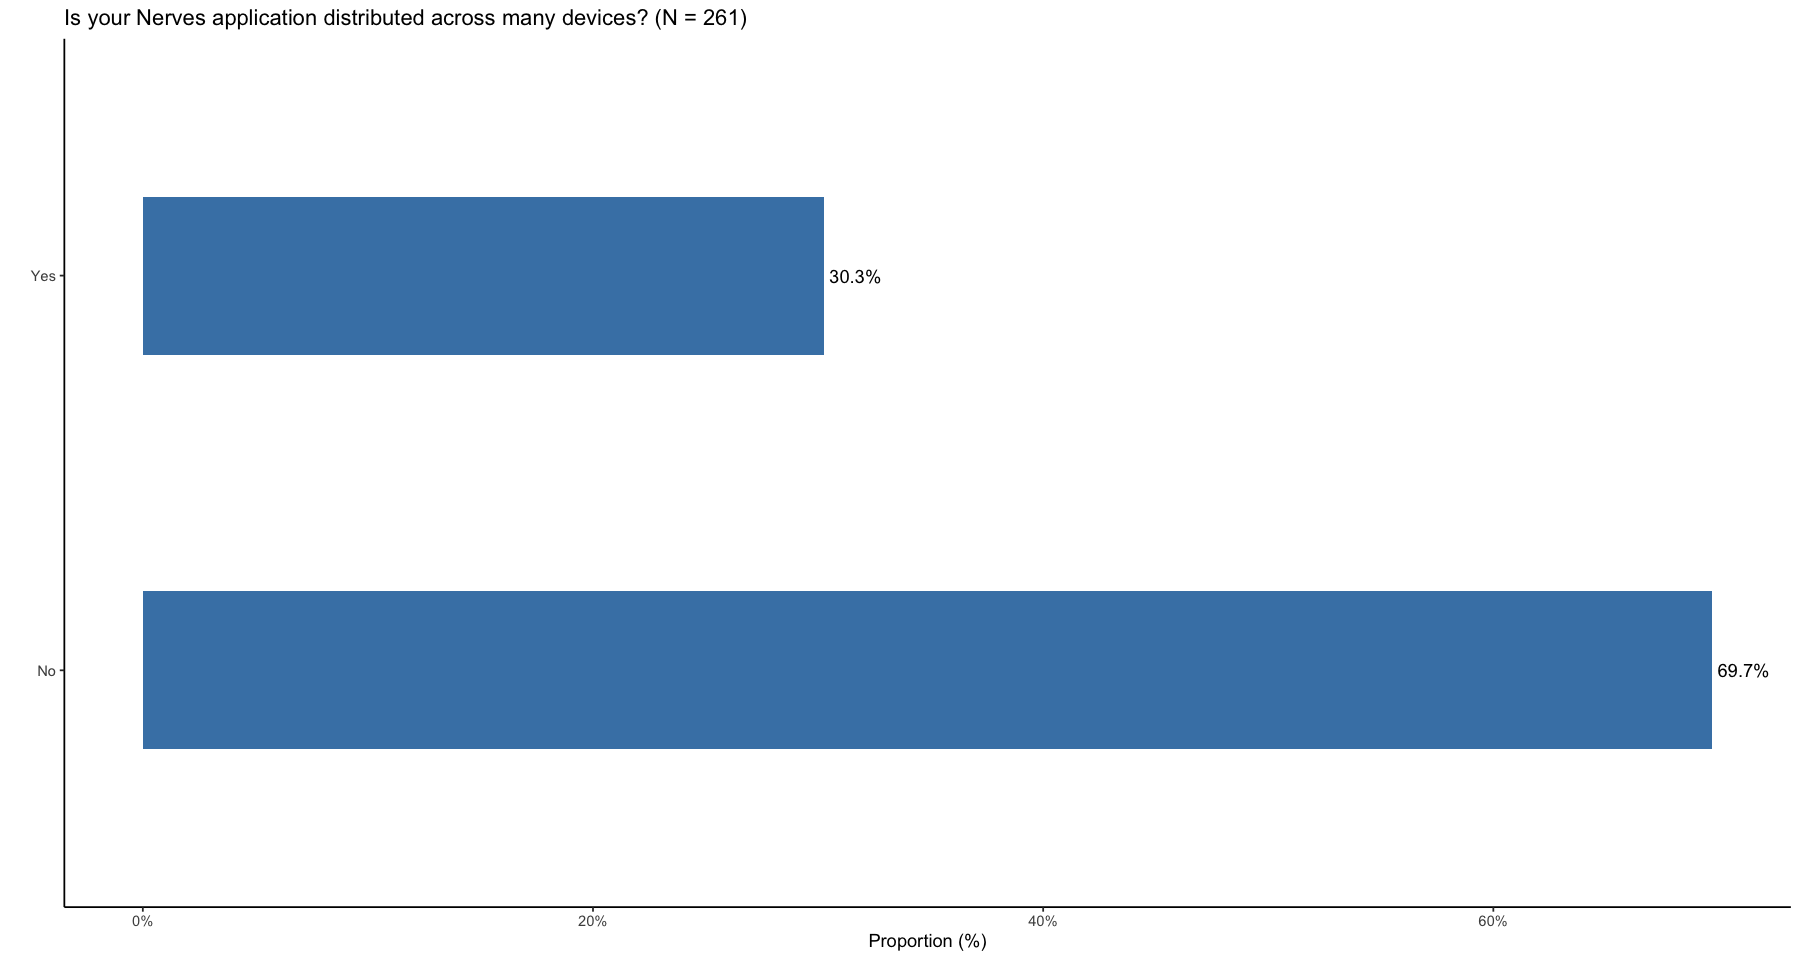

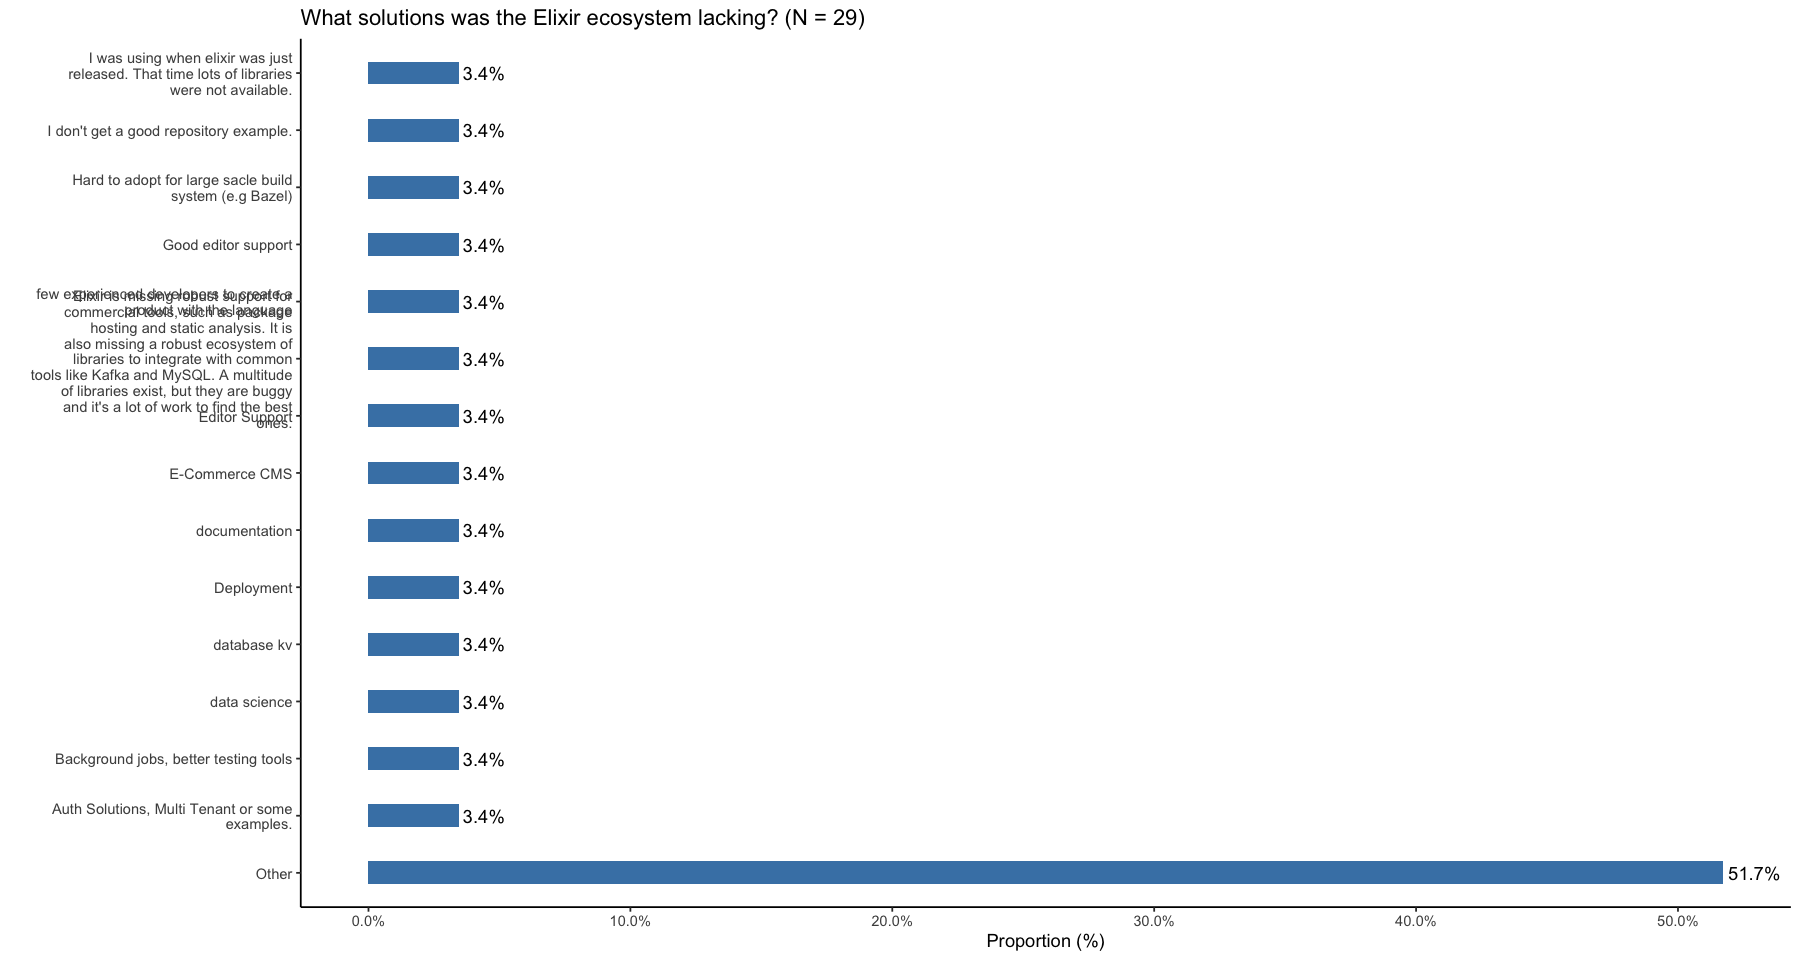

In [58]:
# Print the plots
options(warn=-1)
options(repr.plot.width=15, repr.plot.height=8)
print(survey_plots$plot)